In [1]:

import sys
sys.path
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan')
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/OASIS-master')

import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
import size_contrast_figures as scf
import size_contrast_opto_figures as scof
import opto_utils
import os
import scipy.stats as sst
reload(cc)
reload(utils)

In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/agos/anaconda3/lib/python3.6/site-packages/matplotlib/

<module 'calnet.utils' from '/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/calnet/utils.py'>

In [2]:
os.getcwd()

'/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/simulation/Agos_Code'

In [3]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('Reds')


In [4]:
cache_base = os.path.expanduser('~/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code')
if not os.path.exists(cache_base):
    os.makedirs(cache_base)
cache_base = os.path.join(cache_base, "vip_sst_subnetwork_dynamics_")

In [5]:
# weights_files = glob.glob('../shared_data/calnet_data/weights/weights_201215b/*.npy')
weights_files = glob.glob('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/calnet_data/weights/weights_210513c/*.npy')
weights_files.sort()


In [6]:
len(weights_files)

950

In [7]:
# npyfile = np.load('../shared_data/calnet_data/dynamics/pc_small_opto_tavg_201203g.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/pc_opto_tavg_201203g.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/sst_both_pixels_opto_tavg_201215b.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/pc_opto_tavg_vip_silencing_201203g.npy',allow_pickle=True)[()]
npyfile_coupled = np.load('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/calnet_data/dynamics/vip_both_pixels_opto_tavg_l4_coupled_0_25_210513c.npy',allow_pickle=True)[()]


In [9]:
nwt = len(weights_files)
losses = np.zeros((nwt,))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    losses[iwt] = cc.ModelOri(wtdict,nT=1).loss
    

In [10]:
# weights_files = glob.glob('../shared_data/calnet_data/weights/weights_201203g/*.npy')


import run_calnet_pc_opto_sims

all_mdls = run_calnet_pc_opto_sims.build_models(weights_files)

# reload(cc)
# nwt = len(weights_files)
# mdls = [None for iwt in range(nwt)]
# losses = np.zeros((nwt,))
# for iwt in range(nwt):
# #     wtfile = 'weights_'+good_fits[iwt]+'.npy'
# #     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
#     wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
#     mdls[iwt] = cc.ModelOri(wtdict,nT=1)
#     losses[iwt] = mdls[iwt].loss
    
# mdls_no_pcpv = [None for iwt in range(nwt)]
# for iwt in range(nwt):
#     wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
#     wtdict['Wmy'][[0,0,3,3],[0,3,0,3]] = 0
#     mdls_no_pcpv[iwt] = cc.ModelOri(wtdict,nT=1)
    
# mdls_no_pcpc = [None for iwt in range(nwt)]
# for iwt in range(nwt):
#     wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
#     wtdict['Wmy'][0,0] = 0
#     mdls_no_pcpc[iwt] = cc.ModelOri(wtdict,nT=1)
    
# mdls_no_pcvip = [None for iwt in range(nwt)]
# for iwt in range(nwt):
#     wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
#     wtdict['Wmy'][0,2] = 0
#     wtdict['Wmx'][0,2] = 0
#     mdls_no_pcvip[iwt] = cc.ModelOri(wtdict,nT=1)
    
# mdls_no_pcsst = [None for iwt in range(nwt)]
# for iwt in range(nwt):
#     wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
#     wtdict['Wmy'][0,1] = 0
#     wtdict['Wmx'][0,1] = 0
#     mdls_no_pcsst[iwt] = cc.ModelOri(wtdict,nT=1)
        
# mdls_no_vipbias = [None for iwt in range(nwt)]
# for iwt in range(nwt):
#     wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
#     wtdict['Wmx'][1,2] = 0
#     mdls_no_vipbias[iwt] = cc.ModelOri(wtdict,nT=1)

mdls,mdls_no_pcpc,mdls_no_pcpv,mdls_no_pcvip,mdls_no_pcsst,mdls_no_vipbias,mdls_no_sstvip = all_mdls

low_loss = (losses<np.nanpercentile(losses,10)) #& (npyfile['YY_opto'][:,-1].max(1).max(1)<10)

mdls = [mdl for (mdl,ll) in zip(mdls,low_loss) if ll]
mdls_no_pcpv = [mdl for (mdl,ll) in zip(mdls_no_pcpv,low_loss) if ll]
mdls_no_pcpc = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]
mdls_no_pcvip = [mdl for (mdl,ll) in zip(mdls_no_pcvip,low_loss) if ll]
mdls_no_pcsst = [mdl for (mdl,ll) in zip(mdls_no_pcsst,low_loss) if ll]
mdls_no_vipbias = [mdl for (mdl,ll) in zip(mdls_no_vipbias,low_loss) if ll]
mdls_no_sstvip = [mdl for (mdl,ll) in zip(mdls_no_sstvip,low_loss) if ll]

weights_files = [wf for (wf,ll) in zip(weights_files,low_loss) if ll]

# low_loss = (npyfile['YY_opto'][:,-1].max(1).max(1)<10)


/Users/agos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less


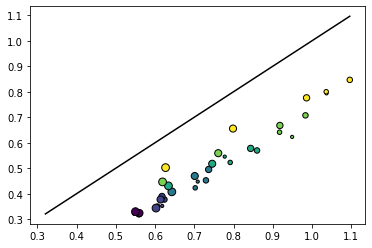

In [11]:
plt.figure()
sca.scatter_size_contrast(mdls[0].XX[:,0],mdls[0].YY[:,0],nsize=6,ncontrast=6)
# plt.plot((0,1),(0,1),c='k')

In [78]:
YY_opto.shape

(94, 31, 36, 1, 8)

In [13]:
# YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
# YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
# YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
# YY_opto_tavg_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
# YY_opto_tavg_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
# YY_opto_tavg_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]
# YY_opto_tavg_no_sstvip = npyfile['YY_opto_tavg_no_sstvip'][:,:,:,np.newaxis,:]

# npyfile = np.load('../shared_data/calnet_data/dynamics/vip_both_pixels_opto_tavg_201215b.npy',allow_pickle=True)[()]

# YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
# YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
# YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_sstvip = npyfile['YY_opto_tavg_no_sstvip'][low_loss,:,:,np.newaxis,:]

npyfile = np.load('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/calnet_data/dynamics/vip_both_pixels_opto_tavg_210513c.npy',allow_pickle=True)[()]
# npyfile = np.load('../shared_data/calnet_data/dynamics/vip_both_pixels_opto_tavg_l4_coupled_0_25_210513c.npy',allow_pickle=True)[()]


YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_sstvip = npyfile['YY_opto_tavg_no_sstvip'][:,:,:,np.newaxis,:]

# npyfile = np.load('../shared_data/calnet_data/dynamics/sst_both_pixels_opto_tavg_201215b.npy',allow_pickle=True)[()]

# YY_opto_sst = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
# YY_opto_no_pcpc_sst = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
# YY_opto_no_pcpv_sst = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_pcvip_sst = npyfile['YY_opto_tavg_no_pcvip'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_pcsst_sst = npyfile['YY_opto_tavg_no_pcsst'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_vipbias_sst = npyfile['YY_opto_tavg_no_vipbias'][low_loss,:,:,np.newaxis,:]
# YY_opto_tavg_no_sstvip_sst = npyfile['YY_opto_tavg_no_sstvip'][low_loss,:,:,np.newaxis,:]

npyfile = np.load('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/calnet_data/dynamics/sst_both_pixels_opto_tavg_210513c.npy',allow_pickle=True)[()]

YY_opto_sst = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc_sst = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
YY_opto_no_pcpv_sst = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_pcvip_sst = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_pcsst_sst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_vipbias_sst = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]
YY_opto_tavg_no_sstvip_sst = npyfile['YY_opto_tavg_no_sstvip'][:,:,:,np.newaxis,:]


In [14]:
# YY_opto = np.load('../shared_data/calnet_data/dynamics/sst_both_pixels_opto_tavg_201215b_baseline.npy',allow_pickle=True)[()]
# YY_opto = YY_opto[low_loss,:,:,np.newaxis,:]
# YY_opto_no_pcpc = np.load('../shared_data/calnet_data/dynamics/sst_both_pixels_opto_tavg_201215b_pcpc.npy',allow_pickle=True)[()]
# YY_opto_no_pcpc = YY_opto_no_pcpc[low_loss,:,:,np.newaxis,:]
# YY_opto_no_pcpv = np.load('../shared_data/calnet_data/dynamics/sst_both_pixels_opto_tavg_201215b_pcpv.npy',allow_pickle=True)[()]
# YY_opto_no_pcpv = YY_opto_no_pcpv[low_loss,:,:,np.newaxis,:]

In [15]:
wtdict['wt_dict'].keys()

dict_keys(['X', 'Y', 'Xi', 'stims', 'barrier', 'opto', 'isn', 'tv', 'stimsOpto', 'celltypesOpto', 'dirOpto', 'dYY', 'coupling', 'smi', 'smi_halo', 'smi_chrimson', 'Eta', 'celltypes', 'inputs'])

In [16]:
Niter = int(1e3)
# opto_levels = 1*np.linspace(-1.5,1.5,31)
opto_levels = 1*np.linspace(-1,1,31)
dt = 1e-1
nopto = len(opto_levels)

In [ ]:
0,6,12,25,50,100


In [17]:
YY_opto.shape

(94, 31, 36, 1, 8)

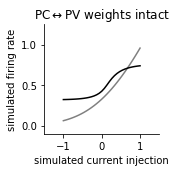

In [18]:
iwt = 0
istim = 0
itype = 0
network_resp = np.nanmean(YY_opto[0][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = mdls[iwt].compute_f_(opto_levels[ilevel]+mdls[iwt].Eta,mdls[iwt].Xi,mdls[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c=np.array((0.5,0.5,0.5)))
plt.plot(opto_levels,network_resp,c='k')
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
plt.title('PC$\leftrightarrow$PV weights intact')
plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity.eps')

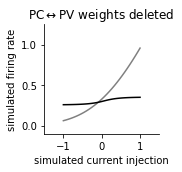

In [19]:
iwt = 0
istim = 0
itype = 0
network_resp = np.nanmean(YY_opto_no_pcpv[0][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = mdls_no_pcpv[iwt].compute_f_(opto_levels[ilevel]+mdls_no_pcpv[iwt].Eta,mdls_no_pcpv[iwt].Xi,mdls_no_pcpv[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c=np.array((0.5,0.5,0.5)))
plt.plot(opto_levels,network_resp,c='k')
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
plt.title('PC$\leftrightarrow$PV weights deleted')
plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpv.eps')

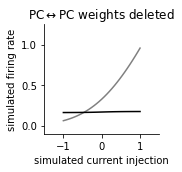

In [20]:
iwt = 0
istim = 0
itype = 0
network_resp = np.nanmean(YY_opto_no_pcpc[0][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = mdls_no_pcpc[iwt].compute_f_(opto_levels[ilevel]+mdls_no_pcpc[iwt].Eta,mdls_no_pcpc[iwt].Xi,mdls_no_pcpc[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c=np.array((0.5,0.5,0.5)))
plt.plot(opto_levels,network_resp,c='k')
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpc.eps')

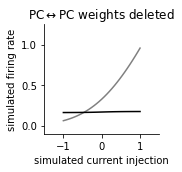

In [21]:
iwt = 0
istim = 0
itype = 0
this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
# this_mdl,this_YY = mdls.copy(),YY_opto.copy()
network_resp = np.nanmean(this_YY[iwt][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c=np.array((0.5,0.5,0.5)))
plt.plot(opto_levels,network_resp,c='k')
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/intrinsic_vs_network_nonlinearity_no_wpcpc.eps')

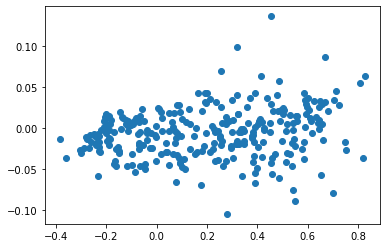

In [22]:
plt.figure()
plt.scatter(mdls[iwt].Eta,mdls[iwt].resEta)

In [23]:
cell_intrinsic_resp.shape

(31,)

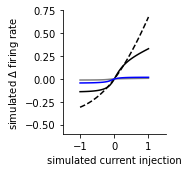

In [24]:
iwt = 1
istim = 0
itype = 0
ibaseline = 15
this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
# this_mdl,this_YY = mdls.copy(),YY_opto.copy()
network_resp = np.nanmean(YY_opto[iwt][:,istim,:,itype],1)
network_resp_no_pcpc = np.nanmean(YY_opto_no_pcpc[iwt][:,istim,:,itype],1)
network_resp_no_pcpv = np.nanmean(YY_opto_no_pcpv[iwt][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].resEta,this_mdl[iwt].resXi,this_mdl[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp-cell_intrinsic_resp[ibaseline],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
plt.plot(opto_levels,network_resp-network_resp[ibaseline],c='k',label='baseline')
plt.plot(opto_levels,network_resp_no_pcpc-network_resp_no_pcpc[ibaseline],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
plt.plot(opto_levels,network_resp_no_pcpv-network_resp_no_pcpv[ibaseline],c='b',label='PC$\leftrightarrow$PV weights deleted')

plt.xlim((-1.5,1.5))
plt.ylim((-0.6,0.75))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated $\Delta$ firing rate')
# plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc.eps')


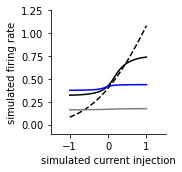

In [25]:
iwt = 0
istim = 0
itype = 0
this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
# this_mdl,this_YY = mdls.copy(),YY_opto.copy()
network_resp = np.nanmean(YY_opto[iwt][:,istim,:,itype],1)
network_resp_no_pcpc = np.nanmean(YY_opto_no_pcpc[iwt][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(opto_levels)
for ilevel in range(opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+0*this_mdl[iwt].resEta,0*this_mdl[iwt].resXi,this_mdl[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(opto_levels,cell_intrinsic_resp,c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
plt.plot(opto_levels,network_resp,c='k',label='baseline')
plt.plot(opto_levels,network_resp_no_pcpc,c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
plt.plot(opto_levels,network_resp_no_pcpv,c='b',label='PC$\leftrightarrow$PV weights deleted')

plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
# plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc.eps')


In [26]:
# weights_files = glob.glob('../shared_data/calnet_data/weights/weights_201215b/*.npy')
# weights_files.sort()

reload(cc)
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
losses = np.zeros((nwt,))
for iwt in range(nwt):
#     wtfile = 'weights_'+good_fits[iwt]+'.npy'
#     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)
    losses[iwt] = mdls[iwt].loss
    
mdls_no_pcpv = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][[0,0,3,3],[0,3,0,3]] = 0
    mdls_no_pcpv[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcpc = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,0] = 0
    mdls_no_pcpc[iwt] = cc.ModelOri(wtdict,nT=1)

In [27]:
len(weights_files)

94

In [28]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amp = wtdict['amp']
        amps[iwt] = amp

In [29]:
len(weights_files)

94

In [30]:
weights_files[0]

'/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/calnet_data/weights/weights_210513c/0005.npy'

In [31]:
import calnet.utils
import sim_utils
nfiles = len(weights_files)
# Ts = np.zeros((nfiles,nQ))
iwt = 0
nN,nP,nQ,nS,nT = mdls[iwt].nN,mdls[iwt].nP,mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
Ks = np.zeros((nfiles,nQ))
Wmys = np.zeros((nfiles,nQ,nQ))
Wmxs = np.zeros((nfiles,nP,nQ))
s02s = np.zeros((nfiles,nQ))
YYs = np.zeros((nfiles,6,6,nQ*nS*nT))
XXs = np.zeros((nfiles,6,6,nP*nS*nT))
Etas = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta1s = np.zeros((nfiles,6,6,nQ*nS*nT))
# Eta2s = np.zeros((nfiles,6,6,nQ*nS*nT))
h1s = np.zeros((nfiles,))
h2s = np.zeros((nfiles,))
losses = np.zeros((nfiles,))
couplings = np.zeros((nfiles,nopto,6,6,nQ*nS*nT,nQ*nS*nT))
phis = np.zeros((nfiles,nopto,6,6,nQ*nS*nT))
for iwt,weights_file in enumerate(weights_files):
    Wstar_dict = np.load(weights_file,allow_pickle=True)[()]
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h = Wstar_dict['as_list']
    try:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl = Wstar_dict['as_list']
        amp = np.ones((nQ*nS*nT,))
    except:
        Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,bl,amp = Wstar_dict['as_list']
    losses[iwt] = Wstar_dict['loss']
#     Wmx,Wmy,Wsx,Wsy,s02,K,kappa,T,XX,XXp,Eta,Xi,h1,h2,h3,Eta1,Eta2,Eta3 = Wstar_dict['as_list']
    WWmy = calnet.utils.gen_Weight_k_kappa_t(Wmy,K,kappa,T,nS=nS,nT=nT)
    WWmx = calnet.utils.gen_Weight_k_kappa_t(Wmx,K,kappa,T,nS=nS,nT=nT)
    tiled_s02 = np.tile(s02,nS*nT)
#     Ts[iwt] = T
    Ks[iwt] = K
    Wmys[iwt] = Wmy
    Wmxs[iwt] = Wmx
    s02s[iwt] = s02
    YY0 = sim_utils.f_miller_troyer(Eta,Xi**2+tiled_s02)
    YYs[iwt] = amp*YY0.reshape((6,6,nQ*nS*nT)) + np.tile(bl,nS*nT)[np.newaxis]
    XXs[iwt] = XX.reshape((6,6,nP*nS*nT))
    Etas[iwt] = Eta.reshape((6,6,nQ*nS*nT))
    h1s[iwt] = h1
    h2s[iwt] = h2
    bltile = np.tile(bl,nS*nT)
    for ilight in range(YY_opto.shape[1]):
        this_YY = 1/amp[np.newaxis,:]*(YY_opto[iwt,ilight].reshape((nN,nQ*nS*nT)) - bltile[np.newaxis,:])
#         this_YY = YY_opto_tavg[iwt,ilight].reshape((nN,nQ*nS*nT))
        phis[iwt,ilight] = mdls[iwt].fprimeXY(mdls[iwt].XX,this_YY).reshape((6,6,nQ*nS*nT))
    for istim in range(nN):
        iistim,jjstim = np.unravel_index(istim,(6,6))
#         phis[iwt,iistim,jjstim] = calnet.utils.fprime_miller_troyer(Eta[istim],Xi[istim]**2+tiled_s02)
        for ilight in range(nopto):
            Phi = np.diag(phis[iwt,ilight,iistim,jjstim])
            couplings[iwt,ilight,iistim,jjstim] = Phi @ np.linalg.inv(np.eye(nQ*nS*nT) - WWmy @ Phi)
            

In [77]:
couplings;

In [33]:
YY_opto.shape

(94, 31, 36, 1, 8)

In [75]:
YY_opto.shape

(94, 31, 36, 1, 8)

In [35]:
    #     low_loss = (losses<np.nanpercentile(losses,10))

    #     mdls = [mdl for (mdl,ll) in zip(mdls,low_loss) if ll]
    #     mdls_no_pcpv = [mdl for (mdl,ll) in zip(mdls_no_pcpv,low_loss) if ll]
    #     mdls_no_pcpc = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]

    #     YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
    #     YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
    #     YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]

    #     losses = losses[low_loss]

    # YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
    # YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
    # YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
    # YY_opto_tavg_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][low_loss,:,:,np.newaxis,:]
    # YY_opto_tavg_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][low_loss,:,:,np.newaxis,:]
    # YY_opto_tavg_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][low_loss,:,:,np.newaxis,:]
    # YY_opto_tavg_no_sstvip = npyfile['YY_opto_tavg_no_sstvip'][low_loss,:,:,np.newaxis,:]
    
    nwt = len(mdls)
    iwt = 0
    itype = 0

    nN = mdls[iwt].nN
    ntypes = mdls[iwt].nQ*mdls[iwt].nS*mdls[iwt].nT
    this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
    # this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
    # this_mdl,this_YY = mdls.copy(),YY_opto.copy()
    network_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcpc = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcpv = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcvip = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcsst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_vipbias = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_sstvip = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    cell_intrinsic_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    for iwt in range(nwt):
        network_resp[iwt] = np.nanmean(YY_opto[iwt],2) # time avg
        network_resp_no_pcpc[iwt] = np.nanmean(YY_opto_no_pcpc[iwt],2)
        network_resp_no_pcpv[iwt] = np.nanmean(YY_opto_no_pcpv[iwt],2)
        network_resp_no_pcvip[iwt] = np.nanmean(YY_opto_tavg_no_pcvip[iwt],2) # time avg
        network_resp_no_pcsst[iwt] = np.nanmean(YY_opto_tavg_no_pcsst[iwt],2)
        network_resp_no_vipbias[iwt] = np.nanmean(YY_opto_tavg_no_vipbias[iwt],2)
        network_resp_no_sstvip[iwt] = np.nanmean(YY_opto_tavg_no_sstvip[iwt],2)

        for ilevel in range(opto_levels.shape[0]):
            cell_intrinsic_resp[iwt,ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)
            
    nwt = len(mdls)
    iwt = 0
    itype = 0

    nN = mdls[iwt].nN
    ntypes = mdls[iwt].nQ*mdls[iwt].nS*mdls[iwt].nT
    this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
    # this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
    # this_mdl,this_YY = mdls.copy(),YY_opto.copy()
    network_resp_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcpc_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcpv_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcvip_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_pcsst_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_vipbias_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    network_resp_no_sstvip_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    cell_intrinsic_resp_sst = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    for iwt in range(nwt):
        network_resp_sst[iwt] = np.nanmean(YY_opto_sst[iwt],2) # time avg
        network_resp_no_pcpc_sst[iwt] = np.nanmean(YY_opto_no_pcpc_sst[iwt],2)
        network_resp_no_pcpv_sst[iwt] = np.nanmean(YY_opto_no_pcpv_sst[iwt],2)
        network_resp_no_pcvip_sst[iwt] = np.nanmean(YY_opto_tavg_no_pcvip_sst[iwt],2) # time avg
        network_resp_no_pcsst_sst[iwt] = np.nanmean(YY_opto_tavg_no_pcsst_sst[iwt],2)
        network_resp_no_vipbias_sst[iwt] = np.nanmean(YY_opto_tavg_no_vipbias_sst[iwt],2)
        network_resp_no_sstvip_sst[iwt] = np.nanmean(YY_opto_tavg_no_sstvip_sst[iwt],2)

In [36]:
network_resps = [network_resp,
        network_resp_no_pcpc,
        network_resp_no_pcpv,
        network_resp_no_pcvip,
        network_resp_no_pcsst,
        network_resp_no_vipbias,
        network_resp_no_sstvip]

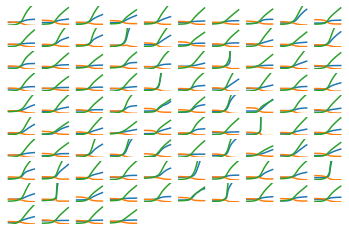

In [37]:
iwt = 2
istim = 0
plt.figure()
for iwt in range(network_resp.shape[0]):
    plt.subplot(10,10,iwt+1)
    for itype in range(3):
        plt.plot(opto_levels,network_resp[iwt,:,istim,itype]) #opto_levels,
    plt.ylim((0,2.5))
    plt.axis('off')
    

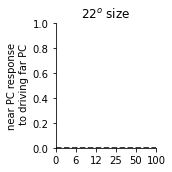

In [38]:
delta = 3
i,j = 0,0
reload(ut)
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 3
colors = np.array(((1,0.8,0),(0,0,0),(1,0,0)))
to_plot = low_loss
if False:
    to_plot = np.ones((couplings.shape[0],), dtype=bool)
    ut.plot_pct_errorbars_hillel(np.arange(6),couplings[to_plot][:,[ilight_off-delta,ilight_off,ilight_off+delta]][:,:,isize,:,i,j],pct=(16,84),colors=colors,delta=0.1)
ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
# plt.savefig('figures/far_pc_near_pc_coupling_sim_vip_opto.eps')


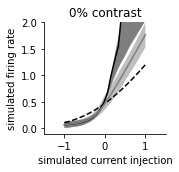

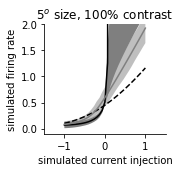

In [39]:
pct_l,pct_u = 16,84
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
    plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    # plt.legend()
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d_no_title.jpg'%istim,dpi=300)
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d.jpg'%istim,dpi=300)


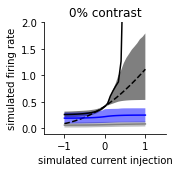

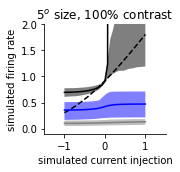

In [40]:
itype = 0
pct_l,pct_u = 16,84
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
    plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d_no_title.jpg'%istim,dpi=300)
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d.jpg'%istim,dpi=300)


In [41]:
# alpha = 0.25

# izero = 15
# zero_subtracted = False

# def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted):
#     if zero_subtracted:
#         to_plot = network_resp - network_resp[:,izero:izero+1]
#     else:
#         to_plot = network_resp - 0
#     plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
#     plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

# def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
#     if zero_subtracted:
#         to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
#     else:
#         to_plot = cell_intrinsic_resp - 0
#     plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
# itype = 2
# pct_l,pct_u = 16,84
# cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
#     plt.figure(figsize=(2.5,2.5))
#     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
# #     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
# #     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
#     plot_nonlinearity(network_resp[:,:,istim,itype],'k','baseline')
#     plot_nonlinearity(network_resp_no_pcsst[:,:,istim,itype],np.array((1,0.65,0)),'PC$\rightarrow$SST weights deleted')
#     plot_nonlinearity(network_resp_no_pcvip[:,:,istim,itype],np.array((1,0,1)),'PC$\rightarrow$VIP weights deleted')
# #     plot_nonlinearity(network_resp_no_pcpc[:,:,istim,itype],np.array((0.5,0.5,0.5)),'PC$\leftrightarrow$PC weights deleted')
#     plot_nonlinearity(network_resp_no_pcpv[:,:,istim,itype],np.array((0,0,1)),'PC$\leftrightarrow$PV weights deleted')
        
#     plt.axvline(0,c='k',linestyle='dashed')
        
# #     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
# #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
# #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
#     # plt.legend()
#     plt.xlim((-1.5,1.5))
#     plt.ylim((-1,4))
#     ut.erase_top_right()
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     # plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.title(title)
#     plt.tight_layout()
# #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d.jpg'%istim,dpi=300)


In [42]:
# alpha = 0.25

# izero = 15
# zero_subtracted = True

# def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted):
#     if zero_subtracted:
#         to_plot = network_resp - network_resp[:,izero:izero+1]
#     else:
#         to_plot = network_resp - 0
#     plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
#     plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

# def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
#     if zero_subtracted:
#         to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
#     else:
#         to_plot = cell_intrinsic_resp - 0
#     plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
# itype = 1
# pct_l,pct_u = 16,84
# cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
#     plt.figure(figsize=(2.5,2.5))
# #     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
# #     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
# #     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
#     plot_nonlinearity(network_resp[:,:,istim,itype],'k','baseline')
#     plot_nonlinearity(network_resp_no_pcsst[:,:,istim,itype],np.array((1,0.65,0)),'PC$\rightarrow$SST weights deleted')
#     plot_nonlinearity(network_resp_no_pcvip[:,:,istim,itype],np.array((1,0,1)),'PC$\rightarrow$VIP weights deleted')
# #     plot_nonlinearity(network_resp_no_pcpc[:,:,istim,itype],np.array((0.5,0.5,0.5)),'PC$\leftrightarrow$PC weights deleted')
#     plot_nonlinearity(network_resp_no_pcpv[:,:,istim,itype],np.array((0,0,1)),'PC$\leftrightarrow$PV weights deleted')
        
#     plt.axvline(0,c='k',linestyle='dashed')
        
# #     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
# #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
# #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
#     # plt.legend()
#     plt.xlim((-1.5,1.5))
#     plt.ylim((-0.75,0.5))
#     ut.erase_top_right()
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     # plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.title(title)
#     plt.tight_layout()
# #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d.jpg'%istim,dpi=300)


In [43]:
# alpha = 0.25

# izero = 15
# zero_subtracted = True

# def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted):
#     if zero_subtracted:
#         to_plot = network_resp - network_resp[:,izero:izero+1]
#     else:
#         to_plot = network_resp - 0
#     plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
#     plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

# def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
#     if zero_subtracted:
#         to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
#     else:
#         to_plot = cell_intrinsic_resp - 0
#     plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
# itype = 0
# pct_l,pct_u = 16,84
# cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
#     plt.figure(figsize=(2.5,2.5))
# #     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
# #     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
# #     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
#     plot_nonlinearity(network_resp[:,:,istim,itype],'k','baseline')
#     plot_nonlinearity(network_resp_no_pcsst[:,:,istim,itype],np.array((1,0.65,0)),'PC$\rightarrow$SST weights deleted')
#     plot_nonlinearity(network_resp_no_pcvip[:,:,istim,itype],np.array((1,0,1)),'PC$\rightarrow$VIP weights deleted')
# #     plot_nonlinearity(network_resp_no_pcpc[:,:,istim,itype],np.array((0.5,0.5,0.5)),'PC$\leftrightarrow$PC weights deleted')
#     plot_nonlinearity(network_resp_no_pcpv[:,:,istim,itype],np.array((0,0,1)),'PC$\leftrightarrow$PV weights deleted')
        
#     plt.axvline(0,c='k',linestyle='dashed')
        
# #     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
# #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
# #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
# #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
#     # plt.legend()
#     plt.xlim((-1.5,1.5))
# #     plt.xlim((-0.5,0.5))
#     plt.ylim((-0.5,1.5))
#     ut.erase_top_right()
#     plt.xlabel('simulated current injection')
#     plt.ylabel('simulated firing rate')
#     # plt.title('PC$\leftrightarrow$PC weights deleted')
#     plt.tight_layout()
# #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.title(title)
#     plt.tight_layout()
# #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d.jpg'%istim,dpi=300)


In [44]:
import sklearn.linear_model as sklm
# fit optimal linear combination
def get_linear_prediction(x, y):
    linreg = sklm.LinearRegression(fit_intercept=True)
    xflat = x.flatten()[:, None]
    yflat = y.flatten()[:, None]
    linreg.fit(xflat, yflat)
    ypred = linreg.predict(xflat)
    return ypred.reshape(y.shape)

def get_fitwise_linear_prediction(x, y):
    assert x.ndim == 3
    ypred_list = []
    linreg = sklm.LinearRegression(fit_intercept=True)
    for ifit in range(x.shape[0]):
        xflat = x[ifit].flatten()[:, None]
        yflat = y[ifit].flatten()[:, None]
        linreg.fit(xflat, yflat)
        ypred = linreg.predict(xflat)
        ypred_list.append(ypred.reshape(y[ifit].shape))
    ypred = np.stack(ypred_list, axis=0)
    return ypred

def get_optimistic_linear_prediction(x, y):
    linreg = sklm.LinearRegression(fit_intercept=True)
    optimistic_size = 0
    optimistic_contrasts = [0, 5]
    xflat = x.reshape((6, 6))[optimistic_size][optimistic_contrasts].flatten()[:, None]
    yflat = y.reshape((6, 6))[optimistic_size][optimistic_contrasts].flatten()[:, None]
    linreg.fit(xflat, yflat)
    xfullflat = x.flatten()[:, None]
    ypred = linreg.predict(xfullflat)
    return ypred.reshape(y.shape)

In [45]:
# import UnivariateSpline
from scipy.interpolate import UnivariateSpline
# import cubic spline interpolation
from scipy.interpolate import CubicSpline
# perform second order spline interpolation and find the x value with the peak dy/dx
def get_peak(x, y):
    spl = CubicSpline(x, y)#, k=3)
    spl_deriv = spl.derivative()
    # evaluate the derivative at a fine grid of points
    xgrid = np.linspace(x.min(), x.max(), 1000)
    ygrid = spl_deriv(xgrid)
    # find the x value with the maximum derivative
    xpeak = xgrid[np.argmax(ygrid)]
    return xpeak

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 720x180 with 0 Axes>

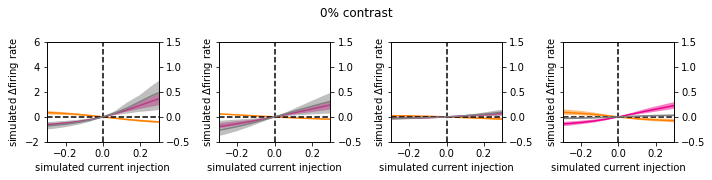

<Figure size 720x180 with 0 Axes>

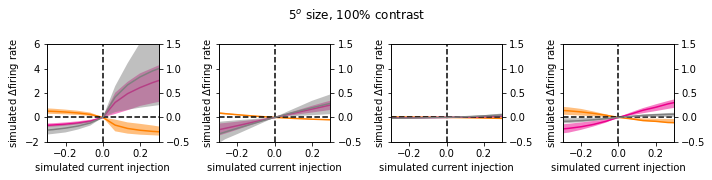

<Figure size 720x180 with 0 Axes>

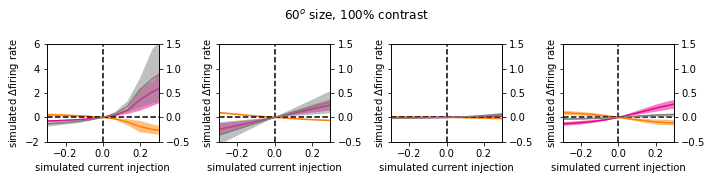

<Figure size 720x180 with 0 Axes>

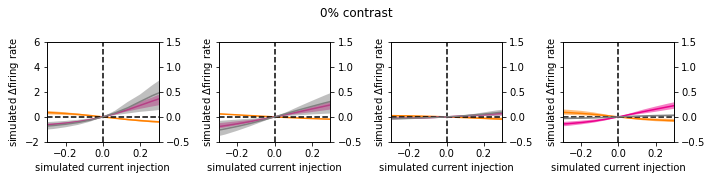

<Figure size 720x180 with 0 Axes>

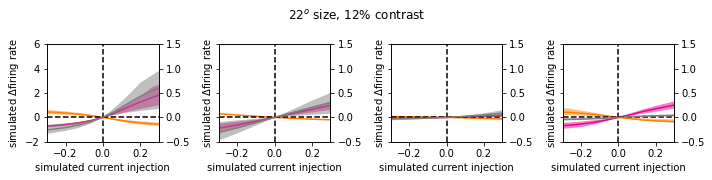

<Figure size 720x180 with 0 Axes>

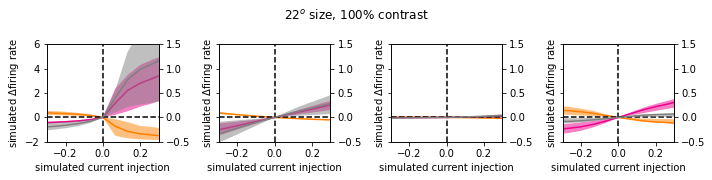

In [47]:
%load_ext autoreload
%autoreload 2

alpha = 0.5

izero = 15
zero_subtracted = True

norm_to_mean = True

lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

reload(ut)

def plot_nonlinearity(ax, network_resp,color,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = network_resp - network_resp[:,izero:izero+1]
    else:
        to_plot = network_resp - 0
    ax.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
    ax.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
    else:
        to_plot = cell_intrinsic_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
np.random.seed(0)
this_lkat = np.random.randint(lkat.sum())
this_lkat = slice(this_lkat, this_lkat+1)

xlim = 0.3#0.5
    
# itype = 2
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
    plt.figure(figsize=(10,2.5))
    fig, axs = plt.subplots(1, 4, figsize=(10,2.5), sharey=True)
#     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    nrs = [network_resp,network_resp_no_sstvip,network_resp_no_pcvip,network_resp_no_pcpv]
    nr_baseline = network_resp
#     cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
    cs = [np.array((0.5,0.5,0.5)),np.array((1,0.5,0)),np.array((236, 0, 140))/255,np.array((0,0,1))]
    lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']


    for iplot,(nr,c,lbl) in enumerate(zip(nrs,cs,lbls)):
        if norm_to_mean:
            nr = ut.norm_middle_axes_to_mean(nr[:,:,:,:],nr_baseline[:,15,:,:])
        pc_ax = axs[iplot].twinx()
        for itype in range(3):
            if itype == 0:
                this_ax = pc_ax
            else:
                this_ax = axs[iplot]
            plot_nonlinearity(this_ax, nr[lkat][:,:,istim,itype],cs[itype],lbl)
#             plot_nonlinearity(nr[lkat][this_lkat][:,:,istim,itype],cs[itype],lbl)
        axs[iplot].axvline(0,c='k',linestyle='dashed')
        axs[iplot].axhline(0,c='k',linestyle='dashed')
#         plt.xlim((-1.5,1.5))
        axs[iplot].set_xlim((-xlim,xlim))
#         plt.xlim((-0.25,0.25))
#         plt.ylim((-1,3.5))
        if norm_to_mean:
            axs[iplot].set_ylim((-2,6))
            pc_ax.set_ylim((-0.5, 1.5))
        else:
            axs[iplot].set_ylim((-1,3))
            pc_ax.set_ylim((-1, 3))
#         plt.ylim((-0.75,2.5))
#         ut.erase_top(axs[iplot])
#         ut.erase_top(pc_ax)
        
#     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
#     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
#     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
#         plt.xlim((-1.5,1.5))
            
        axs[iplot].set_xlabel('simulated current injection')
        if zero_subtracted:
            axs[iplot].set_ylabel(r'simulated $\Delta$firing rate')
        else:
            axs[iplot].set_ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    fig.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.savefig('figures/sst_network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
    fig.suptitle(title)
    fig.tight_layout()
    save = False
    if save:
        plt.savefig('figures/network_nonlinearity_w_and_wo_ws_twinx_stim_%d.jpg'%istim,dpi=300)

In [53]:
import tqdm as tqdm

In [54]:
# nr = network_resp
nr = np.nanmean(YY_opto,3)# time average

import naka_rushton_analysis as nra
reload(nra)
x = opto_levels#-opto_levels.min()#+1
params = np.zeros((nr.shape[0],nr.shape[2],3,6))
use_zero_dims = True
for istim in range(nr.shape[2]):
    print(istim)
    for itype in range(3):
        if use_zero_dims:
            if itype in {0, 1}:
                zero_dims = [False, True, False, True, False, False]
            else:
                assert itype == 2
                zero_dims = [False, True, False, False, False, False]
        else:
            zero_dims = None
        params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x, nr[:,:,istim,itype])#, zero_dims=zero_dims)
        # params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn_joint(x, nr[:,:,istim,itype], zero_dims=zero_dims)

0
did not work for 25
did not work for 36
did not work for 68
did not work for 6
did not work for 21
did not work for 27
did not work for 36
1
did not work for 25
did not work for 27
2
did not work for 21
did not work for 27
3
4
5
did not work for 62
6
did not work for 25
did not work for 13
7
did not work for 28
8
9
did not work for 90
10
11
12
did not work for 25
did not work for 13
did not work for 17
did not work for 33
did not work for 93
13
did not work for 66
did not work for 58
did not work for 93
14
did not work for 88
15
did not work for 69
16
did not work for 27
17
did not work for 25
did not work for 67
18
did not work for 25
did not work for 13
did not work for 37
did not work for 93
19
20
did not work for 6
21
22
did not work for 53
did not work for 80
did not work for 91
23
did not work for 53
24
did not work for 13
did not work for 28
did not work for 56
25
did not work for 93
26
27
28
29
30
did not work for 27
31
did not work for 25
32
did not work for 27
33
34
did not

In [49]:
params

NameError: name 'params' is not defined

In [56]:
# nr = network_resp
nr = np.nanmean(YY_opto,3)# time average

import naka_rushton_analysis as nra
reload(nra)
x = opto_levels#-opto_levels.min()#+1
params_joint = np.zeros((nr.shape[0], nr.shape[2], 2 + 4 * 3))
use_zero_dims = True
for istim in range(nr.shape[2]):
    print(istim)
    if use_zero_dims:
        zero_dims = [
            False, 
            True, False, True, False, 
            True, False, True, False, 
            True, False, False, False, 
            False
        ]
    else:
        zero_dims = None
    # params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x, nr[:,:,istim,itype], zero_dims=zero_dims)
    params_joint[:, istim, :], _ = nra.fit_opt_params_two_asymptote_fn_joint(x, nr[:,:,istim,:3].transpose((2, 0, 1)), zero_dims=zero_dims)

0


AttributeError: module 'naka_rushton_analysis' has no attribute 'fit_opt_params_two_asymptote_fn_joint'

FileNotFoundError: [Errno 2] No such file or directory: 'figures/pc_residual_vs_sigmoid_midpoint.jpg'

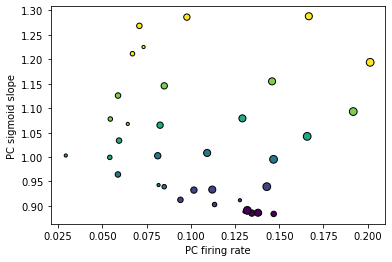

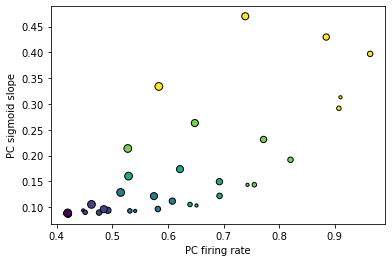

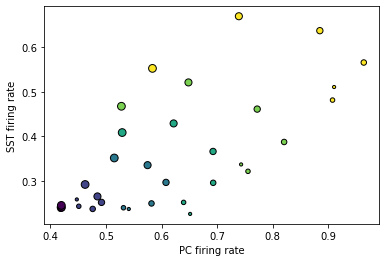

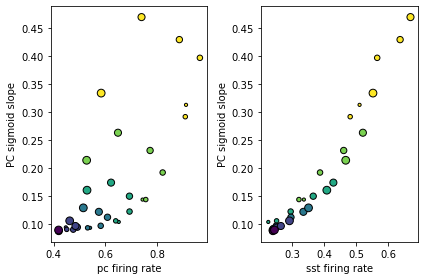

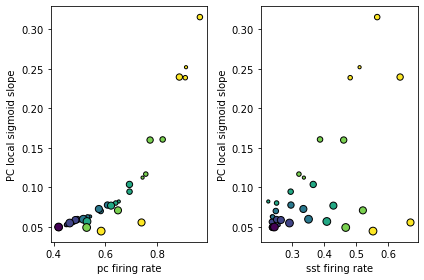

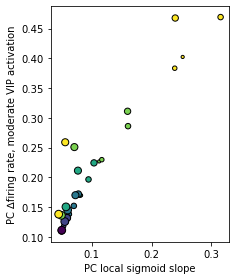

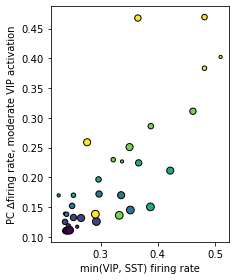

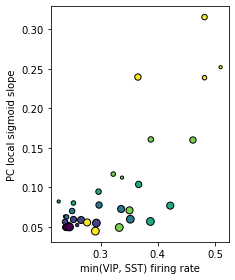

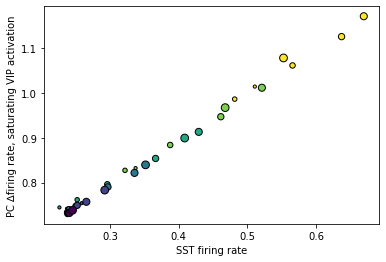

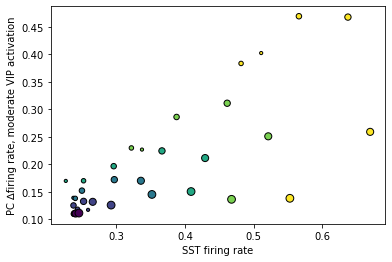

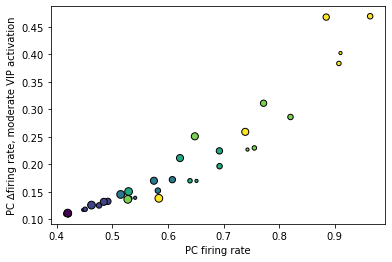

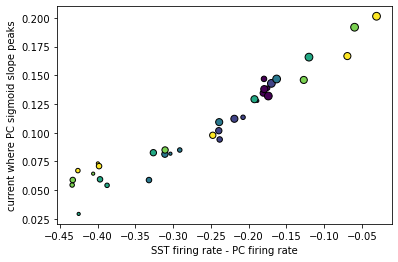

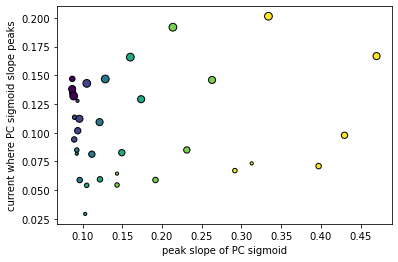

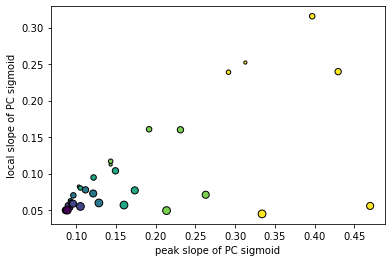

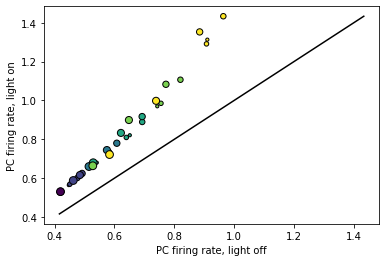

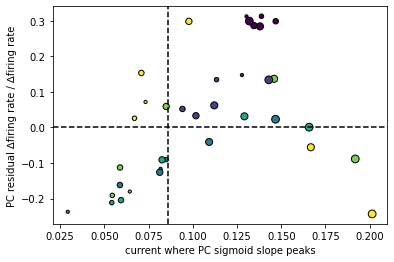

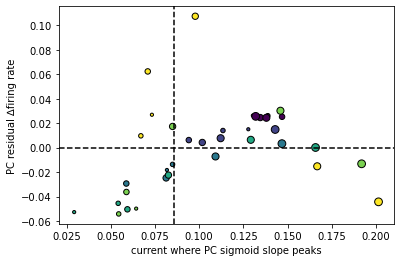

In [57]:
linear_prediction_fn = get_linear_prediction

this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)

ifit = 0
lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
single_fit = False
errorbars = False
def get_fit(arr):
    if single_fit:
        return arr[ifit]
    elif errorbars:
        return arr
    else:
        return np.nanmean(arr[lkat], axis=0)
    
if errorbars:
    scatter_fn = sca.scatter_size_contrast_errorbar
else:
    scatter_fn = sca.scatter_size_contrast

network_resp = network_resps[0]
istim = 0
# itype = 0
# plt.figure()
# plt.plot(get_fit(network_resp)[: , istim, itype])
# compute max abs diff along dim 1 for slope
ipc = 0
isst = 1
ivip = 2
index_by_cell_type = {
    "pc": ipc,
    "sst": isst,
    "vip": ivip
}
ino_light = 15
ichrimson = 17
ihalo = 13
ichrimson_max = network_resp.shape[1] - 1
ihalo_max = 0
index_by_condition = {
    "baseline": ino_light,
    "chrimson": ichrimson,
    "max_chrimson": ichrimson_max,
    "halo": ihalo,
    "max_halo": ihalo_max,
}
activity_by_condition_by_cell_type = {
    condition: {
        cell_type: get_fit(network_resp)[opto_index, :, index_by_cell_type[cell_type]].reshape((-1, 6, 6))
        for cell_type in index_by_cell_type
    }
    for condition, opto_index in index_by_condition.items()
}
slope = np.max(np.diff(network_resp, axis=1), axis=1)
local_slope = np.diff(network_resp, axis=1)[:, ino_light]
ipeak_slope = np.argmax(np.diff(network_resp, axis=1), axis=1)
pc_slope = get_fit(slope)[:, ipc]
pc_local_slope = get_fit(local_slope)[:, ipc]
pc_ipeak_slope = get_fit(ipeak_slope)[:, ipc]
pc_xpeak_slope = get_fit(np.array([
    [get_peak(opto_levels, network_resp[ifit, :, istim, ipc]) 
    for istim in range(network_resp.shape[2])] 
    for ifit in range(network_resp.shape[0])
]))

pc_sigmoid_amplitude = get_fit(np.array([
    [(network_resp[ifit, :, istim, ipc].max() - network_resp[ifit, :, istim, ipc].min())
    for istim in range(network_resp.shape[2])]
    for ifit in range(network_resp.shape[0])
]))

sst_sigmoid_amplitude = get_fit(np.array([
    [(network_resp[ifit, :, istim, isst].max() - network_resp[ifit, :, istim, isst].min())
    for istim in range(network_resp.shape[2])]
    for ifit in range(network_resp.shape[0])
]))

plt.figure()
sca.scatter_size_contrast(pc_xpeak_slope, pc_sigmoid_amplitude, nsize=6, equality_line=False, square=False)
plt.xlabel("PC firing rate")
plt.ylabel("PC sigmoid slope")

plt.figure()
sca.scatter_size_contrast(activity_by_condition_by_cell_type["baseline"]["pc"], pc_slope, nsize=6, equality_line=False, square=False)
plt.xlabel("PC firing rate")
plt.ylabel("PC sigmoid slope")

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["pc"], 
    activity_by_condition_by_cell_type["baseline"]["sst"], 
    nsize=6, equality_line=False, square=False)
plt.xlabel("PC firing rate")
plt.ylabel("SST firing rate")

plt.figure()
for icell_type, cell_type in enumerate(["pc", "sst"]):
    plt.subplot(1, 2, icell_type + 1)
    sca.scatter_size_contrast(activity_by_condition_by_cell_type["baseline"][cell_type], pc_slope, nsize=6, equality_line=False, square=False)
    plt.xlabel(f"{cell_type} firing rate")
    plt.ylabel("PC sigmoid slope")
plt.tight_layout()

plt.figure()
for icell_type, cell_type in enumerate(["pc", "sst"]):
    plt.subplot(1, 2, icell_type + 1)
    sca.scatter_size_contrast(activity_by_condition_by_cell_type["baseline"][cell_type], pc_local_slope, nsize=6, equality_line=False, square=False)
    plt.xlabel(f"{cell_type} firing rate")
    plt.ylabel("PC local sigmoid slope")
plt.tight_layout()

plt.figure()
plt.subplot(1, 2, icell_type + 1)
cell_type = "pc"
sca.scatter_size_contrast(
    pc_local_slope, 
    (
    activity_by_condition_by_cell_type["chrimson"][cell_type]
     - activity_by_condition_by_cell_type["baseline"][cell_type]
    ), nsize=6, equality_line=False, square=False)
plt.xlabel("PC local sigmoid slope")
plt.ylabel("PC ∆firing rate, moderate VIP activation")
plt.tight_layout()

plt.figure()
plt.subplot(1, 2, icell_type + 1)
cell_type = "pc"
sca.scatter_size_contrast(
    np.minimum(
        activity_by_condition_by_cell_type["baseline"]["sst"],
        activity_by_condition_by_cell_type["baseline"]["vip"]
    ),
    (
    activity_by_condition_by_cell_type["chrimson"][cell_type]
     - activity_by_condition_by_cell_type["baseline"][cell_type]
    ), nsize=6, equality_line=False, square=False)
plt.xlabel("min(VIP, SST) firing rate")
plt.ylabel("PC ∆firing rate, moderate VIP activation")
plt.tight_layout()

plt.figure()
plt.subplot(1, 2, icell_type + 1)
cell_type = "pc"
sca.scatter_size_contrast(
    np.minimum(
        activity_by_condition_by_cell_type["baseline"]["sst"],
        activity_by_condition_by_cell_type["baseline"]["vip"]
    ),
    pc_local_slope, 
    nsize=6, equality_line=False, square=False)
plt.xlabel("min(VIP, SST) firing rate")
plt.ylabel("PC local sigmoid slope")
plt.tight_layout()

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["sst"], 
    (
        activity_by_condition_by_cell_type["max_chrimson"]["pc"]
          - activity_by_condition_by_cell_type["baseline"]["pc"]
    ), nsize=6, equality_line=False, square=False)
plt.xlabel("SST firing rate")
plt.ylabel("PC ∆firing rate, saturating VIP activation")

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["sst"], 
    (
        activity_by_condition_by_cell_type["chrimson"]["pc"]
          - activity_by_condition_by_cell_type["baseline"]["pc"]
    ), nsize=6, equality_line=False, square=False)
plt.xlabel("SST firing rate")
plt.ylabel("PC ∆firing rate, moderate VIP activation")

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["pc"], 
    (
        activity_by_condition_by_cell_type["chrimson"]["pc"]
          - activity_by_condition_by_cell_type["baseline"]["pc"]
    ), nsize=6, equality_line=False, square=False)
plt.xlabel("PC firing rate")
plt.ylabel("PC ∆firing rate, moderate VIP activation")

plt.figure()
sca.scatter_size_contrast(
    (
        activity_by_condition_by_cell_type["baseline"]["sst"]
         - activity_by_condition_by_cell_type["baseline"]["pc"]
    ), 
    pc_xpeak_slope, 
    nsize=6, equality_line=False, square=False)
plt.xlabel("SST firing rate - PC firing rate")
plt.ylabel("current where PC sigmoid slope peaks")

plt.figure()
sca.scatter_size_contrast(
    pc_slope,
    pc_xpeak_slope, 
    nsize=6, equality_line=False, square=False)
plt.xlabel("peak slope of PC sigmoid")
plt.ylabel("current where PC sigmoid slope peaks")

plt.figure()
sca.scatter_size_contrast(
    pc_slope,
    pc_local_slope, 
    nsize=6, equality_line=False, square=False)
plt.xlabel("peak slope of PC sigmoid")
plt.ylabel("local slope of PC sigmoid")

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["pc"], 
    activity_by_condition_by_cell_type["chrimson"]["pc"], nsize=6)
# sca.scatter_size_contrast(activity_by_condition_by_cell_type["baseline"]["pc"], get_optimistic_linear_prediction(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]), nsize=6)
plt.xlabel("PC firing rate, light off")
plt.ylabel("PC firing rate, light on")

plt.figure()
sca.scatter_size_contrast(
    pc_xpeak_slope, 
    (
        (activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"])
        / (linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]) - activity_by_condition_by_cell_type["baseline"]["pc"])
        - 1
    ), 
    # activity_by_condition_by_cell_type["chrimson"]["pc"] - linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]), 
    nsize=6,
    equality_line=False,
    square=False
    )
plt.axvline(this_target_amplitude.mean(), color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("current where PC sigmoid slope peaks")
plt.ylabel("PC residual ∆firing rate / ∆firing rate")

plt.figure()
sca.scatter_size_contrast(
    pc_xpeak_slope, 
    (
        (activity_by_condition_by_cell_type["chrimson"]["pc"] - linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]))
    ), 
    nsize=6,
    equality_line=False,
    square=False
    )
plt.axvline(this_target_amplitude.mean(), color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("current where PC sigmoid slope peaks")
plt.ylabel("PC residual ∆firing rate")
plt.savefig("figures/pc_residual_vs_sigmoid_midpoint.jpg", dpi=300)

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["vip"], 
    (
        (activity_by_condition_by_cell_type["chrimson"]["pc"] - linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]))
    ), 
    nsize=6,
    equality_line=False,
    square=False
    )
plt.axvline(this_target_amplitude.mean(), color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("VIP firing rate")
plt.ylabel("PC residual ∆firing rate")

plt.figure()
types_to_plot = ["sst", "vip"]
for this_itype in range(2):
    plt.subplot(1, 2, this_itype + 1)
    sca.scatter_size_contrast(
        activity_by_condition_by_cell_type["baseline"][types_to_plot[this_itype]], 
        (
            (activity_by_condition_by_cell_type["chrimson"]["pc"] - linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]))
        ), 
        nsize=6,
        equality_line=False,
        square=False
        )
    plt.axvline(this_target_amplitude.mean(), color='k', linestyle='--')
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel(f"{types_to_plot[this_itype]} firing rate")
    plt.ylabel("PC residual ∆firing rate")
plt.tight_layout()

plt.figure()
sca.scatter_size_contrast(
    (
        activity_by_condition_by_cell_type["baseline"]["pc"]
        - activity_by_condition_by_cell_type["baseline"]["sst"]
    ), 
    (
        (activity_by_condition_by_cell_type["chrimson"]["pc"] - linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["chrimson"]["pc"]))
    ), 
    nsize=6,
    equality_line=False,
    square=False
    )
plt.axvline(this_target_amplitude.mean(), color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("PC - SST firing rate")
plt.ylabel("PC residual ∆firing rate")

plt.figure()
sca.scatter_size_contrast(
    pc_xpeak_slope, 
    (
        (activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["max_chrimson"]["pc"])
    ), 
    nsize=6,
    equality_line=False,
    square=False
    )
plt.axvline(this_target_amplitude.mean(), color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("current where PC sigmoid slope peaks")
plt.ylabel("PC ∆firing rate, moderate VIP activation - saturating VIP activation")
# plt.savefig("")

plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["sst"], 
    activity_by_condition_by_cell_type["chrimson"]["sst"],
    nsize=6,
    equality_line=False,
    square=False
    )
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("SST firing rate, light off")
plt.ylabel("SST firing rate, moderate VIP activation")

# plt.figure()
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["baseline"]["sst"], 
#     activity_by_condition_by_cell_type["max_chrimson"]["sst"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# plt.axhline(0, color='k', linestyle='--')
# plt.axvline(0, color='k', linestyle='--')
# plt.xlabel("SST firing rate, light off")
# plt.ylabel("SST firing rate, saturating VIP activation")

# plt.figure()
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["baseline"]["sst"], 
#     activity_by_condition_by_cell_type["halo"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# plt.axhline(0, color='k', linestyle='--')
# plt.axvline(0, color='k', linestyle='--')
# plt.xlabel("SST firing rate, light off")
# plt.ylabel("SST ∆firing rate, VIP silencing")

# plt.figure()
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["baseline"]["sst"], 
#     activity_by_condition_by_cell_type["halo"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# plt.axhline(0, color='k', linestyle='--')
# plt.axvline(0, color='k', linestyle='--')
# plt.xlabel("PC firing rate, light off")
# plt.ylabel("PC ∆firing rate, VIP silencing")

# plt.figure()
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["halo"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"], 
#     activity_by_condition_by_cell_type["halo"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# plt.axhline(0, color='k', linestyle='--')
# plt.axvline(0, color='k', linestyle='--')
# plt.xlabel("SST ∆firing rate, VIP silencing")
# plt.ylabel("PC ∆firing rate, VIP silencing")

# plt.figure()
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["max_chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"], 
#     activity_by_condition_by_cell_type["max_chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"], 
#     activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# plt.axhline(0, color='k', linestyle='--')
# plt.axvline(0, color='k', linestyle='--')
# plt.xlabel("SST ∆firing rate, VIP activation")
# plt.ylabel("PC ∆firing rate, VIP activation")

# plt.figure()
# sca.scatter_size_contrast(
#     activity_by_condition_by_cell_type["baseline"]["vip"], 
#     activity_by_condition_by_cell_type["max_halo"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
#     nsize=6,
#     equality_line=False,
#     square=False
#     )
# plt.axhline(0, color='k', linestyle='--')
# plt.axvline(0, color='k', linestyle='--')
# plt.xlabel("VIP firing rate, lights off")
# plt.ylabel("PC ∆firing rate, saturating VIP silencing")


In [58]:
linear_prediction_fn(activity_by_condition_by_cell_type["baseline"]["pc"], activity_by_condition_by_cell_type["baseline"]["pc"]).shape

(1, 6, 6)

FileNotFoundError: [Errno 2] No such file or directory: 'figures/saturating_vip_activation_vs_sst.jpg'

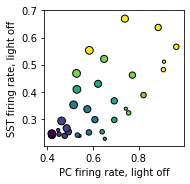

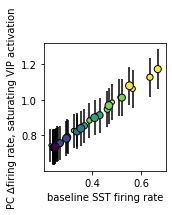

In [59]:
# run prev cell first

linear_prediction_fn = get_fitwise_linear_prediction

def add_fit_line(x, y):
    opto_utils.plot_fill_between_fit(np.stack((x, y), axis=-1), mn_plot=x.min())

activity_by_condition_by_cell_type = {
    condition: {
        cell_type: network_resp[:, opto_index, :, index_by_cell_type[cell_type]].reshape((-1, 6, 6))[lkat]
        for cell_type in index_by_cell_type
    }
    for condition, opto_index in index_by_condition.items()
}

pc_xpeak_slope = np.array([
    [get_peak(opto_levels, network_resp[ifit, :, istim, ipc]) for istim in range(network_resp.shape[2])] 
    for ifit in range(network_resp.shape[0])
]).reshape((-1, 6, 6))[lkat]

plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    activity_by_condition_by_cell_type["baseline"]["pc"],
    activity_by_condition_by_cell_type["baseline"]["sst"],
    equality_line=False,
    square=False,
)
plt.xlabel("PC firing rate, light off")
plt.ylabel("SST firing rate, light off")


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    activity_by_condition_by_cell_type["baseline"]["sst"],
    activity_by_condition_by_cell_type["max_chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
    equality_line=False,
    square=False,
)
plt.xlabel("baseline SST firing rate")
plt.ylabel("PC ∆firing rate, saturating VIP activation")
plt.tight_layout()
plt.savefig("figures/saturating_vip_activation_vs_sst.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
dpc = activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"]
x, y = activity_by_condition_by_cell_type["baseline"]["pc"], dpc
sca.scatter_size_contrast_errorbar(
    x,y,
    equality_line=False,
    square=False,
)
add_fit_line(x,y)
plt.xlabel("baseline PC firing rate")
plt.ylabel("PC ∆firing rate, VIP activation")
plt.tight_layout()
plt.savefig("figures/intermediate_vip_activation_vs_pc.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    activity_by_condition_by_cell_type["chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"],
    activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
    equality_line=False,
    square=False,
)
plt.xlabel("SST ∆firing rate, VIP activation")
plt.ylabel("PC ∆firing rate, VIP activation")
plt.tight_layout()
plt.savefig("figures/intermediate_vip_activation_dpc_vs_dsst.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
x = activity_by_condition_by_cell_type["baseline"]["pc"]
y = activity_by_condition_by_cell_type["chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"]
sca.scatter_size_contrast_errorbar(
    x,y,
    equality_line=False,
    square=False,
)
add_fit_line(x,y)
plt.xlabel("PC firing rate, baseline")
plt.ylabel("SST ∆firing rate, VIP activation")
plt.tight_layout()
plt.savefig("figures/intermediate_vip_activation_dsst_vs_pc.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
dsst = activity_by_condition_by_cell_type["chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"]
residual_sst = dsst - get_linear_prediction(activity_by_condition_by_cell_type["baseline"]["pc"], dsst)
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    residual_sst,
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("midpoint of PC sigmoid")
plt.ylabel("SST residual ∆firing rate, VIP activation")
plt.tight_layout()
plt.savefig("figures/intermediate_vip_dsst_residual_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
dsst = activity_by_condition_by_cell_type["chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"]
residual_sst = dsst #- get_linear_prediction(activity_by_condition_by_cell_type["baseline"]["pc"], dsst)
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    residual_sst / activity_by_condition_by_cell_type["baseline"]["sst"],
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("midpoint of PC sigmoid")
plt.ylabel("(SST ∆firing rate, VIP activation) / baseline SST firing rate")
plt.tight_layout()
# plt.savefig("figures/intermediate_vip_dsst_residual_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    activity_by_condition_by_cell_type["baseline"]["sst"],
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("midpoint of PC sigmoid")
plt.ylabel("baseline SST firing rate")
plt.tight_layout()
plt.savefig("figures/intermediate_vip_sst_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    activity_by_condition_by_cell_type["baseline"]["pc"],
    activity_by_condition_by_cell_type["max_chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
    equality_line=False,
    square=False,
)
plt.xlabel("baseline PC firing rate")
plt.ylabel("PC ∆firing rate, saturating VIP activation")
plt.tight_layout()
plt.savefig("figures/saturating_vip_activation_vs_pc.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    activity_by_condition_by_cell_type["baseline"]["sst"] - activity_by_condition_by_cell_type["baseline"]["pc"],
    equality_line=False,
    square=False,
)
plt.xlabel("midpoint of PC sigmoid")
plt.ylabel("baseline PC - SST firing rate")
plt.tight_layout()
plt.savefig("figures/pc_sst_diff_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["max_chrimson"]["pc"],
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.xlabel("midpoint of PC sigmoid")
plt.ylabel("PC ∆firing rate,\nintermediate - saturating VIP activation")
plt.tight_layout()
plt.savefig("figures/intermediate_and_saturating_vip_activation_diff_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    (
        activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"] 
        - linear_prediction_fn(
            activity_by_condition_by_cell_type["baseline"]["pc"],
            activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"]
        )
    ),
    equality_line=False,
    square=False,
)
plt.axhline(0, color='k', linestyle='--')
plt.axvline(this_target_amplitude.mean(), color='r')
plt.xlabel("midpoint of PC sigmoid")
plt.ylabel("PC ∆firing rate, VIP activation")
plt.tight_layout()
plt.savefig("figures/residual_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    activity_by_condition_by_cell_type["chrimson"]["sst"],
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("PC sigmoid midpoint")
plt.ylabel("SST firing rate, VIP activation")
plt.tight_layout()
# plt.savefig("figures/intermediate_vip_dsst_residual_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    pc_xpeak_slope,
    activity_by_condition_by_cell_type["chrimson"]["sst"] - activity_by_condition_by_cell_type["baseline"]["sst"],
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel("PC sigmoid midpoint")
plt.ylabel("SST ∆firing rate, VIP activation")
plt.tight_layout()
# plt.savefig("figures/intermediate_vip_dsst_residual_vs_sigmoid_midpoint.jpg", dpi=300)


plt.figure(figsize=(2.5, 2.5))
sca.scatter_size_contrast_errorbar(
    activity_by_condition_by_cell_type["baseline"]["sst"],
    activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"],
    equality_line=False,
    square=False,
)
plt.axvline(this_target_amplitude.mean(), color='r')
plt.axhline(0, color='k', linestyle='--')
plt.ylabel("PC ∆")
plt.xlabel("SST baseline")
plt.tight_layout()
# plt.savefig("figures/intermediate_vip_dsst_residual_vs_sigmoid_midpoint.jpg", dpi=300)

In [60]:
plt.figure()
sca.scatter_size_contrast(
    activity_by_condition_by_cell_type["baseline"]["sst"], 
    (
        activity_by_condition_by_cell_type["chrimson"]["pc"]
          - activity_by_condition_by_cell_type["baseline"]["pc"]
    ), nsize=6, equality_line=False, square=False)
plt.xlabel("SST firing rate")
plt.ylabel("PC ∆firing rate, moderate VIP activation")
plt.savefig("figures/pc_delta_vs_sst_baseline.jpg", dpi=300)

delta_pc = (activity_by_condition_by_cell_type["chrimson"]["pc"] - activity_by_condition_by_cell_type["baseline"]["pc"])
plt.figure()
sca.scatter_size_contrast(
    pc_xpeak_slope,
    (
        (delta_pc - get_linear_prediction(activity_by_condition_by_cell_type["baseline"]["sst"], delta_pc))
    ), nsize=6,
    equality_line=False, square=False)
plt.xlabel("PC sigmoid midpoint")
plt.ylabel("PC residual ∆firing rate from SST linear prediction")
plt.savefig("figures/pc_residual_from_sst_prediction.jpg", dpi=300)

ValueError: cannot reshape array of size 3204 into shape (6,6)

<Figure size 432x288 with 0 Axes>

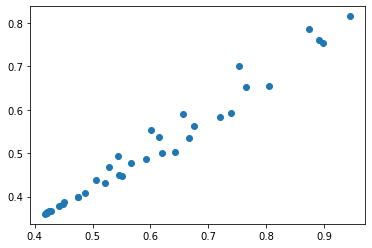

In [61]:
plt.figure()
plt.scatter(network_resp[0, 15, :, 0], network_resp[0, 12, :, 0])

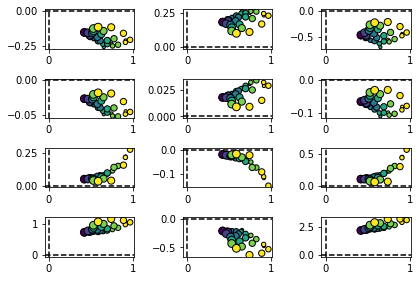

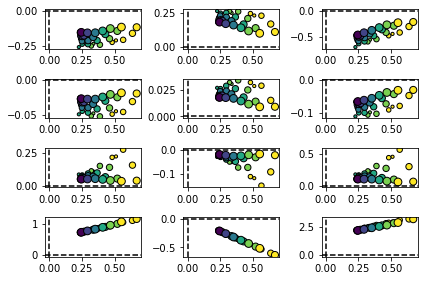

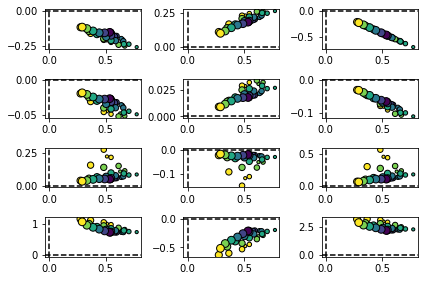

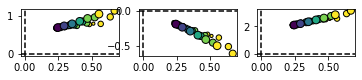

In [62]:
this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)

index_by_cell_type = {
    "pc": ipc,
    "sst": isst,
    "vip": ivip
}

single_fit = False

ino_light = 15
ichrimson = 18
ihalo = 12
ichrimson_max = network_resp.shape[1] - 1
ihalo_max = 0
index_by_condition = {
    "baseline": ino_light,
    "chrimson": this_target_bin, #ichrimson,
    "max_chrimson": ichrimson_max,
    "halo": 15 - (this_target_bin - 15), #ihalo,
    "max_halo": ihalo_max,
}

def get_fit(arr, condition):
    condition_index = index_by_condition[condition]
    if isinstance(condition_index, int):
        condition_index = condition_index * np.ones_like(this_target_bin)
    assert len(condition_index) == len(this_target_bin)
    if single_fit:
        return arr[ifit][condition_index[ifit]]
    else:
        return np.nanmean(arr[np.arange(len(condition_index)), condition_index][lkat], axis=0)
    
activity_by_condition_by_cell_type = {
    condition: {
        cell_type: get_fit(network_resp, condition)[:, index_by_cell_type[cell_type]].reshape((-1, 6, 6))
        for cell_type in index_by_cell_type
    }
    for condition in index_by_condition
}

comparison_condition = "baseline"
for comparison_cell_type in ["pc", "sst", "vip"]:
    plt.figure()
    for cell_type_index, cell_type in enumerate(["pc", "sst", "vip"]):
        for condition_index, condition in enumerate(["max_halo", "halo", "chrimson", "max_chrimson"]):
            plt.subplot(4, 3, 3 * condition_index + cell_type_index + 1)
            sca.scatter_size_contrast(
                activity_by_condition_by_cell_type["baseline"][comparison_cell_type], 
                activity_by_condition_by_cell_type[condition][cell_type] - activity_by_condition_by_cell_type[comparison_condition][cell_type],
                nsize=6,
                equality_line=False,
                square=False
                )
            plt.axhline(0, color='k', linestyle='--')
            plt.axvline(0, color='k', linestyle='--')
    plt.tight_layout()

comparison_condition = "baseline"
comparison_cell_type = "sst"
plt.figure()
for cell_type_index, cell_type in enumerate(["pc", "sst", "vip"]):
    plt.subplot(4, 3, 3 * condition_index + cell_type_index + 1)
    sca.scatter_size_contrast(
        activity_by_condition_by_cell_type[comparison_condition][comparison_cell_type], 
        activity_by_condition_by_cell_type["max_chrimson"][cell_type] - activity_by_condition_by_cell_type["chrimson"][cell_type],
        nsize=6,
        equality_line=False,
        square=False
        )
    plt.axhline(0, color='k', linestyle='--')
    plt.axvline(0, color='k', linestyle='--')

In [63]:
this_target_bin.shape

(94,)

In [64]:
network_resp[np.arange(len(this_target_bin)), this_target_bin].shape

(94, 36, 8)

In [65]:
get_fit(network_resp, condition).shape

(36, 8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


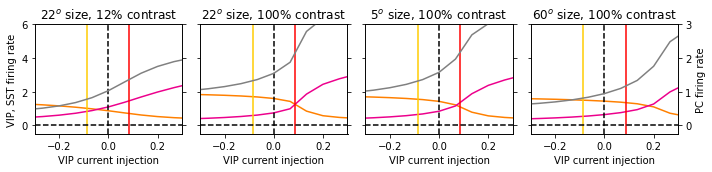

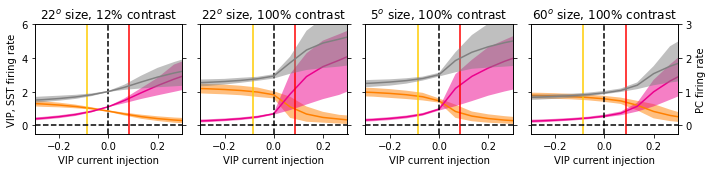

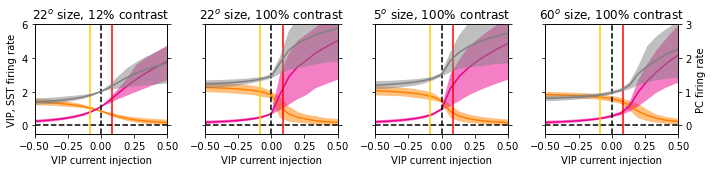

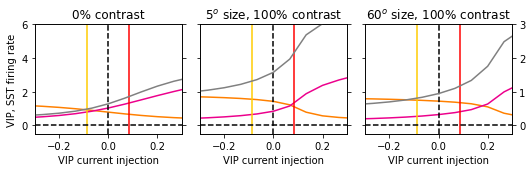

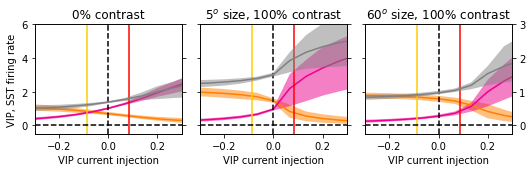

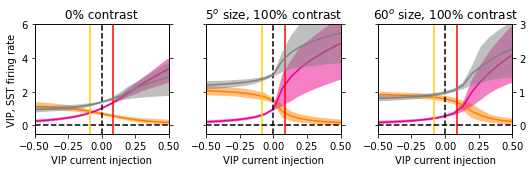

In [71]:
%load_ext autoreload
%autoreload 2

alpha = 0.5

izero = 15
zero_subtracted = False

norm_to_mean = True

lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

reload(ut)

def plot_nonlinearity(ax, network_resp,color,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = network_resp - network_resp[:,izero:izero+1]
    else:
        to_plot = network_resp - 0
    ax.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
    ax.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
    else:
        to_plot = cell_intrinsic_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
    
usize = np.array((5,8,13,22,36,60))
# itype = 2
pct_l,pct_u = 16,84
# istims = [0,5,35,18,20,23]
all_titles = [f"{size}$^o$ size, {contrast}% contrast" for size in usize for contrast in ucontrast]
all_titles[0::6] = ["0% contrast" for _ in range(6)]
# titles = ['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]

this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
line_loc = this_target_amplitude.mean()

xlim = 0.3 # 0.5

istims_list = [
    [20, 23, 5, 35],
    [0, 5, 35]
]

for istim_choice in range(2):
    istims = istims_list[istim_choice]
    titles = [all_titles[istim] for istim in istims]
    for istyle in range(3):
        # plt.figure(figsize=(2.5*len(istims),2.5))
        fig, axs = plt.subplots(1,len(istims),figsize=(2.5*len(istims),2.5), sharey=True)
        if istyle==0:
            np.random.seed(0)
            this_lkat = np.random.randint(lkat.sum())
            this_lkat = slice(this_lkat, this_lkat+1)
        else:
            this_lkat = slice(None)
        for iistim,(istim,title) in enumerate(zip(istims,titles)):
        #     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
        #     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
        #     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)

            nrs = [network_resp,network_resp_no_sstvip,network_resp_no_pcvip,network_resp_no_pcpv]
            nr_baseline = network_resp
        #     cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
            cs = [np.array((0.5,0.5,0.5)),np.array((1,0.5,0)),np.array((236, 0, 140))/255,np.array((0,0,1))]
            lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
            for iplot,(nr,c,lbl) in enumerate(zip(nrs[:1],cs[:1],lbls[:1])):
                if norm_to_mean:
                    nr = ut.norm_middle_axes_to_mean(nr[:,:,:,:],nr_baseline[:,15,:,:])
                pc_ax = axs[iistim].twinx()
                for itype in range(3):
        #             plot_nonlinearity(nr[lkat][:,:,istim,itype],cs[itype],lbl)
                    if itype==0:
                        this_ax = pc_ax
                    else:
                        this_ax = axs[iistim]
                    plot_nonlinearity(this_ax, nr[lkat][this_lkat][:,:,istim,itype],cs[itype],lbl)
                axs[iistim].axvline(line_loc,c=np.array((1,0,0)))
                axs[iistim].axvline(-line_loc,c=np.array((1,0.8,0)))
                axs[iistim].axvline(0,c='k',linestyle='dashed')
                axs[iistim].axhline(0,c='k',linestyle='dashed')
        #         plt.xlim((-1.5,1.5))
                if istyle == 2:
                    axs[iistim].set_xlim((-0.5, 0.5))
                else:
                    axs[iistim].set_xlim((-xlim, xlim))
        #         plt.xlim((-0.25,0.25))
        #         plt.ylim((-1,3.5))
                if norm_to_mean:
                    axs[iistim].set_ylim((-0.5,6))
                    pc_ax.set_ylim((-0.25, 3.0))
                else:
                    axs[iistim].set_ylim((-1,3))
                    pc_ax.set_ylim((-1, 3))
        #         plt.ylim((-0.75,2.5))
#                 ut.erase_top(axs[iistim])
#                 ut.erase_top(pc_ax)
                if iistim < len(istims)-1:
                    pc_ax.set_yticklabels([])

        #     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
        #     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)

        #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
        #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)

        #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
        #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)

            # plt.legend()
        #         plt.xlim((-1.5,1.5))

                axs[iistim].set_xlabel('VIP current injection')
                if zero_subtracted:
                    axs[iistim].set_ylabel(r'$\Delta$firing rate')
                else:
                    if iistim == 0:
                        axs[iistim].set_ylabel('VIP, SST firing rate')
                    if iistim == 3:
                        pc_ax.set_ylabel('PC firing rate')
            # plt.title('PC$\leftrightarrow$PC weights deleted')
            fig.tight_layout()
        #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
        #     plt.savefig('figures/sst_network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
            axs[iistim].set_title(title)
            fig.tight_layout()
            save = False
            if save:
                if istim_choice == 0:
                    suffix = ""
                else:
                    suffix = "_just_size"
                if istyle == 0:
                    plt.savefig(f'figures/network_nonlinearity_all_connections_size_contrast_samples_example_twinx{suffix}.jpg',dpi=300)
                if istyle == 1:
                    plt.savefig(f'figures/network_nonlinearity_all_connections_size_contrast_samples_twinx{suffix}.jpg',dpi=300)
                if istyle == 2:
                    plt.savefig(f'figures/network_nonlinearity_all_connections_size_contrast_samples_twinx_wider{suffix}.jpg',dpi=300)

In [72]:
itype = 0

midpoints = params[:, :, itype, 0].reshape((-1, 6, 6))
np.save(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'), midpoints)

scales = params[:, :, itype, 5].reshape((-1, 6, 6))
np.save(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_scales.npy'), scales)

def compute_amplitude_at_x0(set_of_params):
    x0, a1, b1, a2, b2, lam = set_of_params
    return a2*x0 + b2 - (a1*x0 + b1)

def apply_func_to_pc_params(params, func):
    itype = 0
    output = np.zeros(params.shape[:2])
    for iwt in range(params.shape[0]):
        for istim in range(params.shape[1]):
            output[iwt,istim] = func(params[iwt,istim,itype,:])
    return output

amplitude_at_x0 = apply_func_to_pc_params(params, compute_amplitude_at_x0)
# np.save(os.path.expanduser("~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_amplitude_at_x0.npy"), amplitude_at_x0)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/agos/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'

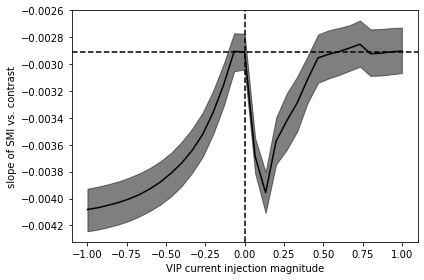

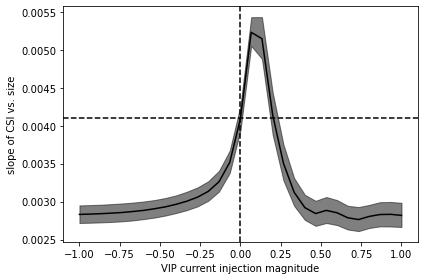

In [68]:
def compute_mimis(network_resps, ibaseline=ibaseline, lkat=lkat):
    itype = 0
    iconn = 0
    xdata = network_resps[iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    nlight = network_resps[iconn].shape[1]
    fn_dict = {'smi': scf.smi_fn, 'csi': scf.csi_fn}
    first_ind_dict = {'smi': 1, 'csi': 0}
    xaxis_dict = {'smi': ucontrast, 'csi': usize}
    mimi_dict = {}
    for key in ['smi', 'csi']:
        mimis = np.zeros((lkat.sum(), 2, nlight))
        for ilight in range(nlight):
            ydata = network_resps[iconn][lkat][:,:,:,itype][:,ilight].reshape((-1,6,6))
            mimis[:, :, ilight] = scof.compute_mimis(xdata, ydata, average=False, norm_first=True, mi_fn=fn_dict[key],
                first_ind=first_ind_dict[key], xaxis=xaxis_dict[key])#, **opt)
        mimi_dict[key] = mimis
    return mimi_dict

mimi_dict = compute_mimis(network_resps)

subtract_light_off = False
def plot_mis_by_opto_level(opto_levels, mimi_dict, save_fig=False, cs=None, subtract_light_off=False, prefix=''):
    for key in ['smi', 'csi']:
        plt.figure()
        vals = mimi_dict[key][:, 1, :]
        if subtract_light_off:
            vals = vals - mimi_dict[key][:, 0, :]
            plt.axhline(0, c='k', linestyle='dashed')
        else:
            plt.axhline(np.nanmean(mimi_dict[key][:, 0, :]), c='k', linestyle='dashed')
        plt.axvline(0, c='k', linestyle='dashed')
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='k', alpha=0.5)
        plt.plot(opto_levels, mn, color='k')#, label=light_lbls[idir])
        plt.xlabel('VIP current injection magnitude')
        plt.ylabel('slope of %s vs. %s' % (key.upper(), 'contrast' if key=='smi' else 'size'))
        # plt.legend()
        plt.tight_layout()
        if save_fig:
            plt.savefig(f'../figures/{prefix}{key}mi_vs_injected_current_magnitude.eps')
            plt.savefig(f'../figures/{prefix}{key}mi_vs_injected_current_magnitude.png')

plot_mis_by_opto_level(opto_levels, mimi_dict, save_fig=False, cs=cs, subtract_light_off=False)

computing...


/Users/agos/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/agos/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
/Users/agos/anaconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


computing...


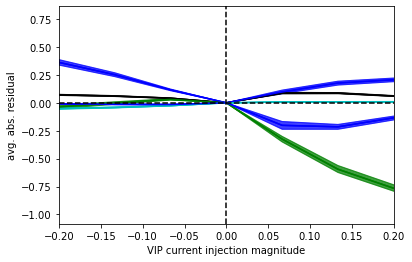

In [69]:
nsize, ncontrast = 6, 6

def compute_slope_intercept_res(xdata,ydata):
    xdata_norm = xdata/xdata.mean()[np.newaxis,np.newaxis]
    ydata_norm = ydata/xdata.mean()[np.newaxis,np.newaxis]
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    return slope,intercept,residual

def compute_slope_intercept_res_reshape(xdata,ydata):
    slope, intercept, residual = compute_slope_intercept_res(xdata,ydata)
    residual = residual.reshape((nsize, ncontrast))
    return slope,intercept,residual

def reshape_resps(network_resps, iconn=0):
    nopto = network_resps[0].shape[1]
    baseline = network_resps[iconn][:,ibaseline,:,:].reshape((-1, 1, nsize, ncontrast, ntypes))
    perturbed = network_resps[iconn][:,:,:,:].reshape((-1, nopto, nsize, ncontrast, ntypes))
    return baseline, perturbed

def compute_slope_intercept_res_arr(network_resps):
    nconn = 6
    nopto = network_resps[0].shape[1]
    slope,intercept,res = [[None for iconn in range(nconn)] for _ in range(3)]
    for iconn in range(6):
        # (nfiles,nopto,nsize,ncontrast,ntypes)
        # xdata = network_resps[1][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes)) # halo
        # ydata = network_resps[2][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes)) # chrimson
        # # (nfiles,1,nsize,ncontrast,ntypes)
        # zdata = network_resps[0][iconn][:,:,:,:].reshape((-1,1,nsize,ncontrast,ntypes)) # ctrl
        zdata, ydata = reshape_resps(network_resps, iconn=iconn) # zdata: ctrl, xdata: halo, ydata: chrimson
        nfits = ydata.shape[0]
        for idir in range(2):
            slope[iconn] = np.zeros(ydata.shape[:2]+ydata.shape[-1:])
            intercept[iconn] = np.zeros(ydata.shape[:2]+ydata.shape[-1:])
            res[iconn] = np.zeros(ydata.shape)
            for itype in range(ntypes):
                for ifit in range(nfits):
                    for iopto in range(nopto):
                        (
                            slope[iconn][ifit,iopto,itype],
                            intercept[iconn][ifit,iopto,itype],
                            res[iconn][ifit,iopto,:,:,itype]
                        ) = compute_slope_intercept_res_reshape(zdata[ifit,0,:,:,itype],ydata[ifit,iopto,:,:,itype])
                        # res[iconn][ifit,iopto,:,:,itype] = this_res.reshape((6,6))
    return slope, intercept, res

def compute_slope_intercept_res_dict(network_resps=None):
    slope, intercept, res = compute_slope_intercept_res_arr(network_resps)
    output_dict = {
        'slope': slope,
        'intercept': intercept,
        'res': res,
    }
    return output_dict

def compute_ilight_resmax(network_resps=None):
    nopto = network_resps[0].shape[1]#11 # number of opto stimuli; 11 seems out of date
    slope,intercept,res = [[[None for idir in range(2)] for iconn in range(6)] for _ in range(3)]
    ilight_resmax = [None for iconn in range(6)]
    slope, intercept, res = compute_slope_intercept_res_arr(network_resps)
    sir_dict = ut.compute_or_load_cached(
        cache_file=cache_base + 'sir_dict.pkl',
        compute_fn=compute_slope_intercept_res_dict,
        network_resps=network_resps,
        # invalidate_caches=True,
    )
    slope, intercept, res = sir_dict['slope'], sir_dict['intercept'], sir_dict['res']
    nconn = len(slope)
    itype = 0
    for iconn in range(nconn):
        ilight_resmax[iconn] = np.argmax(np.abs(res[iconn]).sum(2).sum(2),axis=1)[:,itype]
    result = {'slope':slope,'intercept':intercept,'res':res,'ilight_resmax':ilight_resmax}
    return result
cache_file = (cache_base + 'ilight_resmax.pkl')
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']



limit_xlim = True

save_fig = False

i1, j1 = 0, -1
i2, j2 = -1, -1
itype = 0
plot_slope_intercept = True
plot_examples = True

i1, j1 = 3, 0#0, 0
i2, j2 = 3, 5
itype = 1
plot_slope_intercept = True
plot_examples = True

plt.figure()
iconn = 0
for idir in range(2):
    transform_fn = lambda x: x
    transform_fn = np.abs
    vals = transform_fn(res[iconn][lkat][:, :, :, :, itype]).mean(-1).mean(-1)
    lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
    plt.fill_between(opto_levels, lb, ub, color='k', alpha=0.5)
    plt.plot(opto_levels, mn, color='k')
    if plot_slope_intercept:
        vals = intercept[iconn][lkat][:, :, itype]
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='b', alpha=0.5)
        plt.plot(opto_levels, mn, color='b')

        vals = slope[iconn][lkat][:, :, itype]
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='g', alpha=0.5)
        plt.plot(opto_levels, mn, color='g')
    
    if plot_examples:
        for isize, icontrast, c in [(i1, j1, 'c'), (i2, j2, 'b')]:
            transform_fn = lambda x: x
            vals = transform_fn(res[iconn][lkat][:, :, isize, icontrast, itype])
            lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
            plt.fill_between(opto_levels, lb, ub, color=c, alpha=0.5)
            plt.plot(opto_levels, mn, color=c)

if limit_xlim:
    plt.xlim(-0.2, 0.2)

plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

# ut.zero_origin()
plt.xlabel('VIP current injection magnitude')
plt.ylabel('avg. abs. residual')
if save_fig:
    plt.savefig(f'figures/avg_abs_res_vs_injected_current_magnitude.png')

(0.0, 1.0)

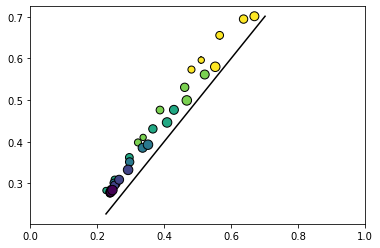

In [70]:
iconn = 0
ctrl, opto = reshape_resps(network_resps, iconn=iconn)
itype = 1
plt.figure()
ilight = 14
isize = 3
# for ilight in [5, 10, 13, 15, 17, 20, 25]:
#     sca.scatter_size_contrast_errorbar(ctrl[lkat, 0, isize:isize+1, :, itype], 
#     opto[lkat, ilight, isize:isize+1, :, itype] - ctrl[lkat, 0, isize:isize+1, :, itype], 
#     dot_size_offset=30, equality_line=False)
for ilight in [14]:
    sca.scatter_size_contrast_errorbar(ctrl[lkat, 0, :, :, itype], 
    opto[lkat, ilight, :, :, itype] ,#- ctrl[lkat, 0, :, :, itype], 
    dot_size_offset=30, equality_line=True)
plt.xlim((0, 1))
# plt.ylim((-0.0, 0.15))

In [ ]:
opto.shape

In [ ]:
idir = 0
iconn = 0
network_resps[iconn].shape

In [ ]:
alpha = 0.5

izero = 15
zero_subtracted = True
normed = True
show_sd = True

norm_to_mean = True


lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

reload(ut)

this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)

xlim = 2.5*this_target_amplitude.mean()

def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted,normed=normed,show_sd=show_sd):
    if zero_subtracted:
        to_plot = network_resp - network_resp[:,izero:izero+1]
    else:
        to_plot = network_resp - 0
    if normed:
        to_plot = to_plot/network_resp[:,izero:izero+1]
    plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
    if show_sd:
        plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)
    
def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
    else:
        to_plot = cell_intrinsic_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
# itype = 2
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
for itype in [0,1]:
    plt.figure(figsize=(2.5,2.5))
#     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    nrs = [network_resp]
    nr_baseline = network_resp
#     cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
    cs = [np.array((0.5,0.5,0.5)),np.array((1,0.5,0)),np.array((236, 0, 140))/255,np.array((0,0,1))]
    lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
    for iplot,(nr,c,lbl) in enumerate(zip(nrs,cs,lbls)):
        if norm_to_mean:
            nr = ut.norm_middle_axes_to_mean(nr[:,:,:,:],nr_baseline[:,15,:,:])
        if itype == 0:
            istims = [5,35]
        elif itype == 1:
            istims = [20,23] #[0, 23]
        nstim = len(istims)
        for iistim,istim in enumerate(istims):
            plt.subplot(1,1,iplot+1)
            plot_nonlinearity(nr[lkat][:,:,istim,itype],cs[itype]*(nstim-iistim)/nstim,lbl)
        plt.axvline(0,c='k',linestyle='dashed')
        plt.axhline(0,c='k',linestyle='dashed')
#         plt.xlim((-1.5,1.5))
        plt.xlim((-xlim,xlim))
#         plt.xlim((-0.25,0.25))
#         plt.ylim((-1,3.5))
        plt.axvline(-this_target_amplitude.mean(),c=np.array((1,0.8,0)))
        plt.axvline(this_target_amplitude.mean(),c=np.array((1,0,0)))
        if itype == 0:
#             plt.ylim((-0.5,2.5))
            if normed:
                plt.ylim((-0.2,0.7))
            else:
                plt.ylim((-0.3,0.85))
        else:
            if normed:
                plt.ylim((0,0.5))
            else:
                plt.ylim((0,0.5))
            plt.xlim((-xlim,0))
#         plt.ylim((-0.75,2.5))
        ut.erase_top_right()
        
#     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
#     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
#     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
#         plt.xlim((-1.5,1.5))
            
        plt.xlabel('simulated current injection')
        if zero_subtracted:
            plt.ylabel(r'simulated $\Delta$firing rate')
        else:
            plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
    save = False
    if save:
        if itype == 1:
            plt.savefig('figures/vip_current_sst_tuning_change_0_22deg.jpg',dpi=300)
        if itype == 0:
            plt.savefig('figures/vip_current_pc_sigmoids_5deg_60deg.jpg',dpi=300)

In [ ]:
this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)

In [ ]:
this_target_bin

In [ ]:
alpha = 0.5

izero = 15
zero_subtracted = True
normed = False
show_sd = True

norm_to_mean = True

lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

reload(ut)

this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)

xlim = 2.5*this_target_amplitude.mean()

def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted,normed=normed,show_sd=show_sd):
    if zero_subtracted:
        to_plot = network_resp - network_resp[:,izero:izero+1]
    else:
        to_plot = network_resp - 0
    if normed:
        to_plot = to_plot/network_resp[:,izero:izero+1]
    plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
    if show_sd:
        plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)
    
def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
    else:
        to_plot = cell_intrinsic_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
# itype = 2
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
for itype in [0]:
    plt.figure(figsize=(2.5,2.5))
#     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    nrs = [network_resp]
    nr_baseline = network_resp
#     cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
    cs = [np.array((0.5,0.5,0.5)),np.array((1,0.5,0)),np.array((236, 0, 140))/255,np.array((0,0,1))]
    lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
    for iplot,(nr,c,lbl) in enumerate(zip(nrs,cs,lbls)):
        if norm_to_mean:
            nr = ut.norm_middle_axes_to_mean(nr[:,:,:,:],nr_baseline[:,15,:,:])
        if itype == 0:
            istims = [0,23]
        elif itype == 1:
            istims = [0,23]
        nstim = len(istims)
        for iistim,istim in enumerate(istims):
            plt.subplot(1,1,iplot+1)
            plot_nonlinearity(nr[lkat][:,:,istim,itype],cs[itype]*(nstim-iistim)/nstim,lbl)
        plt.axvline(0,c='k',linestyle='dashed')
        plt.axhline(0,c='k',linestyle='dashed')
#         plt.xlim((-1.5,1.5))
        plt.xlim((-xlim,xlim))
#         plt.xlim((-0.25,0.25))
#         plt.ylim((-1,3.5))
        plt.axvline(-this_target_amplitude.mean(),c=np.array((1,0.8,0)))
        plt.axvline(this_target_amplitude.mean(),c=np.array((1,0,0)))
        if itype == 0:
#             plt.ylim((-0.5,2.5))
            if normed:
                plt.ylim((-0.2,0.7))
            else:
                plt.ylim((-0.3,0.85))
        else:
            if normed:
                plt.ylim((0,0.5))
            else:
                plt.ylim((0,0.5))
            plt.xlim((-xlim,0))
#         plt.ylim((-0.75,2.5))
        ut.erase_top_right()
        
#     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
#     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
#     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
#     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
#         plt.xlim((-1.5,1.5))
            
        plt.xlabel('simulated current injection')
        if zero_subtracted:
            plt.ylabel(r'simulated $\Delta$firing rate')
        else:
            plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()

In [ ]:
this_target_amplitude.mean()

In [ ]:
this_target_amplitude.mean()

In [ ]:
    alpha = 0.5

    izero = 15
    zero_subtracted = False

    def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted):
        if zero_subtracted:
            to_plot = network_resp - network_resp[:,izero:izero+1]
        else:
            to_plot = network_resp - 0
        plt.plot(opto_levels,np.nanpercentile(to_plot,50,axis=0),c=color,label=label)
        plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

    def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
        if zero_subtracted:
            to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
        else:
            to_plot = cell_intrinsic_resp - 0
        plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)

    # itype = 2
    nr = network_resp
    pct_l,pct_u = 16,84
    cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
    plt.figure(figsize=(5,5))
#     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
    lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
    for istim in range(36):
        for itype in range(3):
            plt.subplot(6,6,istim+1)
            plot_nonlinearity(nr[:,:,istim,itype],cs[itype],lbl)
        plt.axvline(0,c='k',linestyle='dashed')
        plt.axhline(0,c='k',linestyle='dashed')
#         plt.xlim((-1.5,1.5))
        plt.xlim((-1,1))
#         plt.ylim((-1,3.5))
        plt.ylim((-1,4))
        ut.erase_top_right()
        plt.axis('off')
    plt.tight_layout()

In [ ]:
params.shape

In [ ]:
nr = network_resp_sst

import naka_rushton_analysis as nra
reload(nra)
x = opto_levels#-opto_levels.min()#+1
params_sst = np.zeros((nr.shape[0],nr.shape[2],3,6))
for istim in range(nr.shape[2]):
    for itype in range(3):
        print((istim,itype))
        params_sst[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
        

In [ ]:
reload(nra)
plt.figure(figsize=(6,6))
iwt = 0
istim = 0
cs = [np.array((0,0,0)),np.array((1,0.65,0)),np.array((1,0,1))]
to_plot = np.zeros(params.shape[:3]+(len(opto_levels),))
for iwt in range(params.shape[0]):
    for istim in range(36):
        for itype in range(3):#3):
            to_plot[iwt,istim,itype] = nra.two_asymptote_fn(x,*params[iwt,istim,itype,:])
for istim in range(36):
    for itype in range(1):#3):
        plt.subplot(6,6,istim+1)
        plt.plot(x,np.nanpercentile(to_plot[:,istim,itype],50,axis=0),c=cs[itype],linewidth=1)
#         plt.plot(x,nra.two_asymptote_fn(x,*np.nanpercentile(params[:,istim,itype,:],50,axis=0)),c=cs[itype],linewidth=1)
    #         plt.plot(x,nr[iwt,:,istim,itype])
        plt.plot(x,to_plot[:,istim,itype].T,c=cs[itype],linewidth=0.25,alpha=0.25)
    #         plt.plot(x,nra.two_asymptote_fn(x,*params_sst[iwt,istim,itype,:]))
        plt.axis('off')
        plt.xlim((-1.5,1.5))
#             plt.ylim((-0.1,4.5))
        plt.ylim((-0.1,3))
        plt.axvline(0,c='k',linestyle='dashed',linewidth=0.25)

In [ ]:
plt.figure(figsize=(4.5,10.5))
for ivar in range(6):
    for itype in range(3):
        plt.subplot(7,3,3*ivar+itype+1)
        plt.imshow(np.nanpercentile(params[:,:,itype,ivar],50,axis=0).reshape((6,6)))
        plt.colorbar()
for itype in range(3):
    plt.subplot(7,3,18+itype+1)
    plt.imshow(np.nanpercentile(nr[:,15,:,itype],50,axis=0).reshape((6,6)))
    plt.colorbar()
plt.tight_layout()


In [ ]:
plt.figure(figsize=(4.5,10.5))
for ivar in range(6):
    for itype in range(3):
        plt.subplot(7,3,3*ivar+itype+1)
        plt.imshow(np.nanpercentile(params_sst[:,:,itype,ivar],50,axis=0).reshape((6,6)))
        plt.colorbar()
for itype in range(3):
    plt.subplot(7,3,18+itype+1)
    plt.imshow(np.nanpercentile(nr[:,15,:,itype],50,axis=0).reshape((6,6)))
    plt.colorbar()
plt.tight_layout()


In [ ]:
usize = np.array((5,8,13,22,36,60))
ucontrast = np.array((0,6,12,25,50,100))
cs = np.array(((0.5,0.5,0.5),(0,0,0)))

# (x0,a1,b1,a2,b2,lam) are the order of the parameters

outliers = np.any(np.any(params[:,:,:,4] - params[:,:,:,2] > 10, axis=1), axis=1)

plt.figure(figsize=(4.5,10.5))
for ivar in range(6):
    for itype in range(3):
        plt.subplot(7,3,3*ivar+itype+1)
        ut.plot_pct_errorbars_hillel(np.arange(6),params[:,:,itype,ivar].reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1)
        plt.xticks(np.arange(6),ucontrast)
        ut.erase_top_right()
        
for ivar in [0,5]:
    if ivar == 0:
        transform = lambda x: x
    elif ivar == 5:
        transform = lambda x: x
    plt.figure(figsize=(4.5,1.5))
    for itype in range(3):
        plt.subplot(1,3,itype+1)
        ut.plot_pct_errorbars_hillel(np.arange(6),transform(params[:,:,itype,ivar]).reshape((-1,6,6))[~outliers][:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
        plt.xticks(np.arange(6),ucontrast)
        ut.erase_top_right()
        
plt.figure(figsize=(4.5,1.5))
for itype in range(3):
    plt.subplot(1,3,itype+1)
    # ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
    # ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
    # for ifit in range(params[~outliers].shape[0]):
    #     rg = range(ifit, ifit+1)
    # figure_of_merit = params[:,:,itype,5]*(params[:,:,itype,4]-params[:,:,itype,2])
    figure_of_merit = params_joint[:,:,0]
    # figure_of_merit = (params_joint[:,:,4 + 4 * itype] - params_joint[:,:,2 + 4 * itype])
    # figure_of_merit = figure_of_merit/figure_of_merit[:,0:1]
    # figure_of_merit = figure_of_merit - figure_of_merit.mean(1)[:, np.newaxis]
    # figure_of_merit = params[:,:,itype,5]
    ut.plot_pct_errorbars_hillel(np.arange(6),(figure_of_merit).reshape((-1,6,6))[~outliers][:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(6),ucontrast)
    ut.erase_top_right()
        
plt.figure(figsize=(4.5,1.5))
for itype in range(3):
    plt.subplot(1,3,itype+1)
    ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[~outliers][:,:,[1,5]].transpose((0,2,1)),pct=(16,84),delta=0.1,colors=cs)
    ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[~outliers][:,:,[1,5]].transpose((0,2,1)),pct=(16,84),delta=0.1,colors=cs)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(6),usize)
    ut.erase_top_right()
    
# plt.figure(figsize=(4.5,1.5))
# for itype in range(3):
#     plt.subplot(1,3,itype+1)
#     ut.plot_pct_errorbars_hillel(np.arange(6),(params_sst[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
#     ut.plot_pct_errorbars_hillel(np.arange(6),(params_sst[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
#     plt.axhline(0,c='k',linestyle='dashed')
#     plt.xticks(np.arange(6),ucontrast)
#     ut.erase_top_right()
        
# plt.figure(figsize=(4.5,1.5))
# for itype in range(3):
#     plt.subplot(1,3,itype+1)
#     ut.plot_pct_errorbars_hillel(np.arange(6),(params_sst[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[:,:,[1,5]].transpose((0,2,1)),pct=(16,84),delta=0.1,colors=cs)
#     ut.plot_pct_errorbars_hillel(np.arange(6),(params_sst[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[:,:,[1,5]].transpose((0,2,1)),pct=(16,84),delta=0.1,colors=cs)
#     plt.axhline(0,c='k',linestyle='dashed')
#     plt.xticks(np.arange(6),usize)
#     ut.erase_top_right()
    

In [ ]:
plt.figure()
for ifit in range(10):
    plt.plot(params_joint[ifit, 0, :])
plt.axhline(0, linestyle="dashed")

In [ ]:
params_joint.shape

In [ ]:
itype = 0
ivar = 
print(params[:,:,itype,ivar].mean())

In [ ]:
usize = np.array((5,8,13,22,36,60))
cs = np.array(((0.5,0.5,0.5),(0,0,0)))

save = False

var_lbls = [r'$I_0$','','','','',r'$I_1$']

lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

plt.figure(figsize=(5,2.5))
itype = 0
for iivar,ivar in enumerate([0,5]):
    this_param = params[lkat][:,:,itype,ivar].reshape((-1,6,6))[:,[0,5],:].copy()
    plt.subplot(1,2,iivar+1)
    ut.plot_pct_errorbars_hillel(np.arange(6),this_param,pct=(16,84),delta=0.1,colors=cs)
    plt.xticks(np.arange(6),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel(var_lbls[ivar])
    if ivar==0:
        plt.axhline(0,c='k',linestyle='dashed')
    else:
        plt.gca().set_ylim(bottom=0)
plt.tight_layout()
if save:
    plt.savefig('figures/two_asymptote_fn_params.eps')
    
# plt.figure(figsize=(2.5,2.5))
# ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,3]*opto_levels[25]+params[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
# ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,1]*opto_levels[5]+params[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
# plt.axhline(0,c='k',linestyle='dashed')
# plt.xticks(np.arange(6),ucontrast)
# ut.erase_top_right()
# plt.tight_layout()
# plt.ylim((-1.6,1.6))
# plt.xlabel('contrast (%)')

# plt.figure(figsize=(2.5,2.5))
# ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,3]*opto_levels[25]+params[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
# ut.plot_pct_errorbars_hillel(np.arange(6),(params[:,:,itype,1]*opto_levels[5]+params[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
# plt.axhline(0,c='k',linestyle='dashed')
# plt.xticks(np.arange(6),ucontrast)
# ut.erase_top_right()
# plt.tight_layout()
# plt.ylim((-1.6,1.6))
# plt.xlabel('contrast (%)')
# nra.two_asymptote_fn(opto_levels,*params[0,0,itype,:])

# plt.figure(figsize=(5,2.5))
# itype = 0
# for iivar,ivar in enumerate([0,5]):
#     plt.subplot(1,2,iivar+1)
#     ut.plot_pct_errorbars_hillel(np.arange(6),params_sst[:,:,itype,ivar].reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
#     plt.xticks(np.arange(6),ucontrast)
#     ut.erase_top_right()
#     plt.xlabel('contrast (%)')
#     plt.ylabel(var_lbls[ivar])
#     if ivar==0:
#         plt.axhline(0,c='k',linestyle='dashed')
# plt.tight_layout()

# plt.figure(figsize=(2.5,2.5))
# ut.plot_pct_errorbars_hillel(np.arange(6),(params_sst[:,:,itype,3]*opto_levels[30]+params_sst[:,:,itype,4]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
# ut.plot_pct_errorbars_hillel(np.arange(6),(params_sst[:,:,itype,1]*opto_levels[0]+params_sst[:,:,itype,2]-nr[:,15,:,itype]).reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
# plt.axhline(0,c='k',linestyle='dashed')
# plt.xticks(np.arange(6),ucontrast)
# ut.erase_top_right()
# plt.tight_layout()
# plt.ylim((-1.3,1.3))
# plt.xlabel('contrast (%)')

In [ ]:
itype = 0
amplitude_at_extrema = np.zeros(params.shape[:2])
amplitude_at_x0 = np.zeros(params.shape[:2])
# params: x0,a1,b1,a2,b2,lam
# amplitude at extrema is a2*x0 + b2 - (a1*x0 + b1)
for iwt in range(amplitude_at_extrema.shape[0]):
    for istim in range(amplitude_at_extrema.shape[1]):
        this_curve = nra.two_asymptote_fn(opto_levels,*params[iwt,istim,itype,:])
        amplitude_at_extrema[iwt,istim] = this_curve[-1] - this_curve[0]
        amplitude_at_x0[iwt,istim] = compute_amplitude_at_x0(params[iwt,istim,itype,:])
        
norm_to_mean = True
        
if norm_to_mean:
    amplitude_at_extrema = ut.norm_to_mean(amplitude_at_extrema,nr_baseline[:,15,:,0])

usize = np.array((5,8,13,22,36,60))
cs = np.array(((0.5,0.5,0.5),(0,0,0)))

var_lbls = [r'$I_0$','','','','',r'$I_1$']

lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),amplitude_at_extrema[lkat][:,:].reshape((-1,6,6))[:,[0,5],:],pct=(16,84),delta=0.1,colors=cs)
plt.xticks(np.arange(6),ucontrast)
ut.erase_top_right()
plt.xlabel('contrast (%)')
plt.ylabel("amplitude at extrema")
if ivar==0:
    plt.axhline(0,c='k',linestyle='dashed')
plt.gca().set_ylim(bottom=0)
plt.tight_layout()
# plt.savefig('figures/two_asymptote_fn_amplitude.eps')

plt.figure(figsize=(2.5,2.5))
amplitudes_to_plot = amplitude_at_x0[lkat][:,:].reshape((-1,6,6))[:,[0,5],:]
xscale = params[lkat,:,itype,5].reshape((-1,6,6))[:,[0,5],:]
ut.plot_pct_errorbars_hillel(np.arange(6),amplitudes_to_plot,pct=(16,84),delta=0.1,colors=cs)
plt.xticks(np.arange(6),ucontrast)
ut.erase_top_right()
plt.xlabel('contrast (%)')
plt.ylabel(r"amplitude at $I_0$")
if ivar==0:
    plt.axhline(0,c='k',linestyle='dashed')
plt.gca().set_ylim(bottom=0)
plt.tight_layout()
# plt.savefig('figures/two_asymptote_fn_amplitude_at_x0.eps')

plt.figure(figsize=(2.5,2.5))
amplitudes_to_plot = amplitude_at_x0[lkat][:,:].reshape((-1,6,6))[:,[0,5],:]
delta_amplitudes_to_plot = amplitudes_to_plot - amplitudes_to_plot[:,:,0:1]
ut.plot_pct_errorbars_hillel(np.arange(6),delta_amplitudes_to_plot,pct=(16,84),delta=0.1,colors=cs)
plt.xticks(np.arange(6),ucontrast)
ut.erase_top_right()
plt.xlabel('contrast (%)')
plt.ylabel(r"$\Delta$amplitude at $I_0$")
if ivar==0:
    plt.axhline(0,c='k',linestyle='dashed')
plt.gca().set_ylim(bottom=-0.04)
plt.tight_layout()
# plt.savefig('figures/two_asymptote_fn_amplitude_at_x0.eps')

In [ ]:
amplitudes_to_plot.shape

In [ ]:
iwt = 0
istim = 0
itype = 0
plt.figure(figsize=(2.5,2.5,))
plt.plot(opto_levels,nra.two_asymptote_fn(opto_levels,*params[iwt,istim,itype,:]),c='k')
plt.plot(opto_levels,nr[iwt,:,istim,itype],c='b')
plt.axvline(0,c='k',linestyle='dashed')
# plt.savefig('figures/two_asymptote_fn.eps')

In [ ]:
iwt = 2
itype = 0
plt.figure(figsize=(7.5,7.5,))
for istim in range(36):
    plt.subplot(6,6,istim+1)
    plt.plot(opto_levels,nra.two_asymptote_fn(opto_levels,*params[iwt,istim,itype,:]),c='k')
    plt.plot(opto_levels,nr[iwt,:,istim,itype],c='b')
    plt.axvline(0,c='k',linestyle='dashed')
    # plt.savefig('figures/two_asymptote_fn.eps')

In [ ]:
plt.figure()
for istim in range(36):
    bins = np.linspace(-0.6,0.6,21)
    plt.subplot(6,6,istim+1)
#     plt.hist(params[:,istim,itype,0],bins=bins)
    for itype in range(3):
        plt.hist(params[:,istim,itype,0]-params[:,26,0,0],bins=bins,alpha=0.25)
    plt.axvline(0,c='k',linestyle='dashed')
    plt.xlim((-0.6,0.6))
    
plt.figure()
for istim in range(36):
    bins = np.linspace(0,0.4,21)
    plt.subplot(6,6,istim+1)
    plt.hist(params[:,istim,itype,5],bins=bins)
    plt.axvline(0.2,c='k',linestyle='dashed')
    plt.xlim((0,0.4))

In [ ]:
nr = network_resp

itype = 2
ivar = 4
xdata = np.nanpercentile(nr[:,15,:,itype],50,axis=0).reshape((6,6))
# ydata = np.nanpercentile(nr[:,10,:,itype],50,axis=0).reshape((6,6))
ydata = np.nanpercentile(params[:,:,itype,ivar],50,axis=0).reshape((6,6))
plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast(xdata,ydata-xdata,equality_line=False,square=False)
# sca.scatter_size_contrast(xdata,ydata,equality_line=True,square=True)

In [ ]:
len(mdls)

In [ ]:
nr = network_resp

itype1 = 2
itype2 = 1
xdata = np.nanpercentile(nr[:,15,:,itype1],50,axis=0).reshape((6,6))
ydata = np.nanpercentile(nr[:,15,:,itype2],50,axis=0).reshape((6,6))
plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast(xdata,ydata,equality_line=False,square=False)

itype1 = 2
itype2 = 1
ivar1 = 4
ivar2 = 2
xdata = np.nanpercentile(params[:,:,itype1,ivar1],50,axis=0).reshape((6,6))
ydata = np.nanpercentile(params[:,:,itype2,ivar2],50,axis=0).reshape((6,6))
plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast(xdata,ydata,equality_line=False,square=False)


In [ ]:
nr = network_resp

itype = 1
ivar = 2
xdata = np.nanpercentile(nr[:,15,:,itype],50,axis=0).reshape((6,6))
# ydata = np.nanpercentile(nr[:,10,:,itype],50,axis=0).reshape((6,6))
ydata = np.nanpercentile(params[:,:,itype,ivar],50,axis=0).reshape((6,6))
plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast(xdata,ydata-xdata,equality_line=False,square=False)
# sca.scatter_size_contrast(xdata,ydata,equality_line=True,square=True)

In [ ]:
nr = network_resp

itype1 = 1
itype2 = 0
ivar1 = 2
ivar2 = 4
xdata = np.nanpercentile(nr[:,15,:,itype1],50,axis=0).reshape((6,6))
# ydata = np.nanpercentile(nr[:,10,:,itype],50,axis=0).reshape((6,6))
ydata = np.nanpercentile(params[:,:,itype2,ivar2]-params[:,:,itype2,ivar1],50,axis=0).reshape((6,6))
plt.figure(figsize=(2.5,2.5))
sca.scatter_size_contrast(xdata,ydata,equality_line=False,square=False)
# sca.scatter_size_contrast(xdata,ydata,equality_line=True,square=True)

In [ ]:
ivar1,ivar2 = 0,2
plt.figure(figsize=(7.5,2.5))
for itype in range(3):
    plt.subplot(1,3,itype+1)
    sca.scatter_size_contrast(np.nanpercentile(params[:,:,itype,ivar1],50,axis=0),np.nanpercentile(params[:,:,itype,ivar2],50,axis=0),nsize=6,ncontrast=6,equality_line=False,square=False)
plt.tight_layout()

ivar1,ivar2 = 1,3
plt.figure(figsize=(7.5,2.5))
for itype in range(3):
    plt.subplot(1,3,itype+1)
    sca.scatter_size_contrast(np.nanpercentile(params[:,:,itype,ivar1],50,axis=0),np.nanpercentile(params[:,:,itype,ivar2],50,axis=0),nsize=6,ncontrast=6)
plt.tight_layout()

ivar1,ivar2 = 2,4
plt.figure(figsize=(7.5,2.5))
for itype in range(3):
    plt.subplot(1,3,itype+1)
    sca.scatter_size_contrast(np.nanpercentile(params[:,:,itype,ivar1],50,axis=0),np.nanpercentile(params[:,:,itype,ivar2],50,axis=0),nsize=6,ncontrast=6)
plt.tight_layout()

ivar1,ivar2 = 2,5
plt.figure(figsize=(7.5,2.5))
for itype in range(3):
    plt.subplot(1,3,itype+1)
    sca.scatter_size_contrast(np.nanpercentile(params[:,:,itype,ivar1],50,axis=0),np.nanpercentile(params[:,:,itype,ivar2],50,axis=0),nsize=6,ncontrast=6,equality_line=False,square=False)
plt.tight_layout()

In [ ]:
nr = network_resp

# %matplotlib notebook
plt.figure(figsize=(7.5,2.5))
iwt = 1
istim = 5
optomin,optomax = 10,20
rg = slice(optomin,optomax+1)
itype1 = 2
itype2 = 1
cs = plt.cm.viridis(np.linspace(0,1,6))
edge_cs = ['b','k','r']
ss = np.arange(1,7)*5
nsize = 6
ncontrast = 6
lim = (0,2)
lkat = np.abs(nr).max(1).max(1).max(1)<5
for iitype,(itype1,itype2) in enumerate(zip([2,2,0],[0,1,1])):
    plt.subplot(1,3,iitype+1)
    for isize in range(nsize):
        for icontrast in range(ncontrast):
            istim = ncontrast*isize+icontrast
        #     plt.scatter(nr[iwt,15,istim,itype1],nr[iwt,15,istim,itype2])
        #     plt.plot(nr[iwt,rg,istim,itype1],nr[iwt,rg,istim,itype2],alpha=0.5)
            plt.plot(np.nanmean(nr[lkat][:,rg,istim,itype1],0),np.nanmean(nr[lkat][:,rg,istim,itype2],0),alpha=0.5,c=cs[icontrast])#,linewidth=isize+1)
            for iiopto,iopto in enumerate([optomin,15,optomax]):#range(12,19,3):
                plt.scatter(np.nanmean(nr[lkat][:,iopto,istim,itype1],0),np.nanmean(nr[lkat][:,iopto,istim,itype2],0),c=cs[icontrast:icontrast+1],s=ss[isize],edgecolor=edge_cs[iiopto])
#     plt.xlim(lim)
#     plt.ylim(lim)
                # plt.axis('equal')

In [ ]:
import calnet.utils
reload(calnet.utils)
# cache_file = os.path.join(cache_base, 'compute_couplings.pkl')
# def compute_couplingses(network_resps=None, mdlses=None):
#     couplingses = [None for _ in network_resps]
#     for iconn in range(len(network_resps)):
couplings = calnet.utils.compute_couplings(network_resp[lkat],[m for m, mask in zip(mdls, lkat) if mask])
#     return couplingses
# couplingses = ut.compute_or_load_cached(
#     cache_file, 
#     compute_couplingses, 
#     network_resps=network_resps, 
#     mdlses=mdlses
# )

In [ ]:
network_resp[lkat].shape

In [ ]:
celltype_input = 0
celltype_output = 4
# plt.figure()
# plt.imshow(np.nanmean(couplings[:, 15, :, :, celltype_input, celltype_output], 0))
# plt.colorbar()
isize, icontrast = 0, 5
istims = [(0, 0), (0, 5), (3, 5), (5, 5)]
ncontrast = 6
for isize, icontrast in istims:
    plt.figure()
    plt.plot(np.nanmean(network_resp[lkat, :, ncontrast * isize + icontrast, celltype_output], 0))
    plt.plot(np.nanmean(couplings[:, :, isize, icontrast, celltype_input, celltype_output], 0))
    plt.axhline(0, color='k', linestyle='--')

for isize, icontrast in istims:
    plt.figure()
    # plt.plot(np.nanmean(network_resp[lkat, :, ncontrast * isize + icontrast, celltype_output], 0))
    plt.plot(couplings[:, :, isize, icontrast, celltype_input, celltype_output].T)
    plt.axhline(0, color='k', linestyle='--')

plt.figure()
plt.scatter(pc_xpeak_slope, np.nanmean(couplings[:, 15, :, :, celltype_input, celltype_output], 0).flatten())
plt.axhline(0, color='k', linestyle='--')

In [ ]:
couplings.shape

In [ ]:
pc_xpeak_slope.shape

In [ ]:
nr = network_resp_sst

# %matplotlib notebook
plt.figure(figsize=(7.5,2.5))
iwt = 1
istim = 5
optomin,optomax = 10,20
rg = slice(optomin,optomax+1)
itype1 = 2
itype2 = 1
cs = plt.cm.viridis(np.linspace(0,1,6))
edge_cs = ['b','k','r']
ss = np.arange(1,7)*5
nsize = 6
ncontrast = 6
lim = (0,2)
for iitype,(itype1,itype2) in enumerate(zip([2,2,0],[0,1,1])):
    plt.subplot(1,3,iitype+1)
    for isize in range(nsize):
        for icontrast in range(ncontrast):
            istim = ncontrast*isize+icontrast
        #     plt.scatter(nr[iwt,15,istim,itype1],nr[iwt,15,istim,itype2])
        #     plt.plot(nr[iwt,rg,istim,itype1],nr[iwt,rg,istim,itype2],alpha=0.5)
            plt.plot(np.nanmean(nr[:,rg,istim,itype1],0),np.nanmean(nr[:,rg,istim,itype2],0),alpha=0.5,c=cs[icontrast])#,linewidth=isize+1)
            for iiopto,iopto in enumerate([optomin,15,optomax]):#range(12,19,3):
                plt.scatter(np.nanmean(nr[:,iopto,istim,itype1],0),np.nanmean(nr[:,iopto,istim,itype2],0),c=cs[icontrast:icontrast+1],s=ss[isize],edgecolor=edge_cs[iiopto])
    plt.ylim(lim)
                # plt.axis('equal')

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(3.5,3.5))
iwt = 1
istim = 5
optomin,optomax = 12,18
rg = slice(optomin,optomax+1)
itype1 = 2
itype2 = 1
cs = plt.cm.viridis(np.linspace(0,1,6))
ss = np.arange(1,7)*5
nsize = 6
ncontrast = 6
itype1 = 0
itype2 = 1
itype3 = 2
for itype2 in [0,1]:
    ax = fig.add_subplot(projection='3d')
#     plt.subplot(1,2,itype2+1)
    for isize in range(nsize):
        for icontrast in range(ncontrast):
            istim = ncontrast*isize+icontrast
        #     plt.scatter(nr[iwt,15,istim,itype1],nr[iwt,15,istim,itype2])
        #     plt.plot(nr[iwt,rg,istim,itype1],nr[iwt,rg,istim,itype2],alpha=0.5)
            ax.plot(np.nanmean(nr[:,rg,istim,itype1],0),np.nanmean(nr[:,rg,istim,itype2],0),np.nanmean(nr[:,rg,istim,itype3],0),alpha=0.5,c=cs[icontrast])
            for iopto in [optomin,15,optomax]:#range(12,19,3):
                ax.scatter(np.nanmean(nr[:,iopto,istim,itype1],0),np.nanmean(nr[:,iopto,istim,itype2],0),np.nanmean(nr[:,iopto,istim,itype3],0),c=cs[icontrast:icontrast+1],s=ss[isize],edgecolor='k')
# plt.axis('equal')

In [ ]:
reload(ut)
ialign = 0
irun = 0
idir = 0

ylim = (0,2.5)

for iconn,ylim in zip([0,2,3,4],[ylim for _ in range(4)]):

    nr = network_resps[0][iconn][:,15].reshape((-1,6,6,8))

    lbls = ['pc_l4','pc_l23','sst','vip','pv']
    c_l4 = np.array((0,0.5,0))
    c_l23 = [np.array((0.33,0.33,0.33)),np.array((0.5,0.5,0.5))][::-1]
    c_sst = [np.array((0.75,0.45,0)),np.array((1,0.65,0))][::-1]
    c_vip = [np.array((0.75,0,0.75)),np.array((1,0,1))][::-1]
    c_pv = np.array((0,0,1))
    colors = [c_l4,c_l23,c_sst,c_vip,c_pv]
    usize = [5,8,13,22,36,60]
    ucontrast = [0,6,12,25,50,100]

    for iisize,isize in enumerate([0,3]): #[0,4]):
        plt.figure(figsize=(2.5,2.5))
        these_types = [1,2,3]
        for itype in these_types:#range(len(rsexpt)):
            data = nr[:,:,:,itype-1]
#             data = data/np.nanmean(np.nanmean(data,1),1)[:,np.newaxis,np.newaxis]
        #     for icontrast in range(6):
            #     plt.errorbar([5,8,13,22,36,60],np.nanmean(data,0)[:,icontrast],compute_sem(data,0)[:,icontrast])
#             ut.plot_pct_errorbars_hillel(ucontrast,data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
            ut.plot_pct_errorbars_hillel(np.arange(6),data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
            plt.xticks(np.arange(6),ucontrast)
    #         plt.legend(['6%','25%','100%'])
            plt.xlabel('contrast (%)')
            plt.ylabel('event rate/mean event rate')
#         plt.legend(['PC','SST','VIP'],frameon=False)
        plt.title('%d$^o$ size'%usize[isize])
        plt.ylim(ylim)
        ut.erase_top_right()
        plt.tight_layout()
#         plt.savefig('figures/sim_pc_sst_vip_%s_contrast_by_size_%d.eps'%(conn_lbls[iconn],isize))

In [ ]:
    alpha = 0.5

    izero = 15
    zero_subtracted = False

    def plot_nonlinearity(network_resp,color,label,zero_subtracted=zero_subtracted):
        if zero_subtracted:
            to_plot = network_resp - network_resp[:,izero:izero+1]
        else:
            to_plot = network_resp - 0
        plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
        plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

    def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
        if zero_subtracted:
            to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
        else:
            to_plot = cell_intrinsic_resp - 0
        plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)

    # itype = 2
    nr = network_resp_sst
    pct_l,pct_u = 16,84
    cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
    plt.figure(figsize=(10,10))
#     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
    lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
    for istim in range(36):
        for itype in range(3):
            plt.subplot(6,6,istim+1)
            plot_nonlinearity(nr[:,:,istim,itype],cs[itype],lbl)
        plt.axvline(0,c='k',linestyle='dashed')
        plt.axhline(0,c='k',linestyle='dashed')
#         plt.xlim((-1.5,1.5))
        plt.xlim((-1.5,1.5))
#         plt.ylim((-1,3.5))
        plt.ylim((-1,4))
        ut.erase_top_right()
        plt.axis('off')
    plt.tight_layout()

In [ ]:
save_fig = False
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
lbls = [None,'SST','VIP',None]
for nr,lbl in zip([network_resp,network_resp_no_vipbias,network_resp_no_sstvip],['baseline','no_vipbias','no_sstvip']):
    for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
        plt.figure(figsize=(2.5,2.5))
        for itype in [1,2]:
            plt.plot(opto_levels,np.nanmean(nr,0)[:,istim,itype],c=cs[itype],label=lbls[itype])
            plt.fill_between(opto_levels,np.nanpercentile(nr,pct_l,axis=0)[:,istim,itype],np.nanpercentile(nr,pct_u,axis=0)[:,istim,itype],facecolor=cs[itype],alpha=0.5)
        # plt.legend()
        plt.xlim((-0.5,0.5))
        plt.ylim((-0.1,2))
        plt.axvline(0,c='k',linestyle='dashed')
        ut.erase_top_right()
        plt.xlabel('simulated PC current injection')
        plt.ylabel('simulated firing rate')
        # plt.title('PC$\leftrightarrow$PC weights deleted')
        plt.tight_layout()
        if save_fig:
            plt.savefig('figures/pc_current_injection_sst_vip_%s_stim_%d_no_title.jpg'%(lbl,istim),dpi=300)
        plt.title(title)
        plt.legend(frameon=False)
        plt.tight_layout()
        if save_fig:
            plt.savefig('figures/pc_current_injection_sst_vip_%s_stim_%d.jpg'%(lbl,istim),dpi=300)


In [ ]:
save_fig = False
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
lbls = [None,'SST','VIP',None]
# conn_lbls = ['baseline','no_pcpv','no_pcsst','no_pcvip']
for inr,(nr,lbl) in enumerate(zip([network_resp,network_resp_no_pcpv,network_resp_no_pcsst,network_resp_no_pcvip],['baseline','no_pcpv','no_pcsst','no_pcvip'])):
    for istim,title in zip([0,5,35,18,20,23],['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']):
        plt.figure(figsize=(2.5,2.5))
        for itype in [1,2]:
            plt.plot(opto_levels,np.nanpercentile(nr,50,axis=0)[:,istim,itype],c=cs[itype],label=lbls[itype])
            plt.fill_between(opto_levels,np.nanpercentile(nr,pct_l,axis=0)[:,istim,itype],np.nanpercentile(nr,pct_u,axis=0)[:,istim,itype],facecolor=cs[itype],alpha=0.5)
        # plt.legend()
        plt.xlim((-0.5,0.5))
        plt.ylim((-0.1,3))
        plt.axvline(0,c='k',linestyle='dashed')
        ut.erase_top_right()
        plt.xlabel('simulated PC current injection')
        plt.ylabel('simulated firing rate')
        # plt.title('PC$\leftrightarrow$PC weights deleted')
        plt.tight_layout()
        if save_fig:
            plt.savefig('figures/pc_current_injection_sst_vip_%s_stim_%d_no_title.jpg'%(lbl,istim),dpi=300)
        plt.title(title)
        plt.legend(frameon=False)
        plt.tight_layout()
        if save_fig:
            plt.savefig('figures/pc_current_injection_sst_vip_%s_stim_%d.jpg'%(lbl,istim),dpi=300)


In [ ]:
pct_l,pct_u = 16,84
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
    plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted')
    plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
    plt.xlim((-1.5,1.5))
    plt.ylim((-0.1,2))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d_no_title.jpg'%istim,dpi=300)
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d.jpg'%istim,dpi=300)
